# Exploring Wikipedia clickstream data: English Wiki in June-December 2018

## Exploratory data analysis

### 1. Introduction  
This notebook contains exploratory data analysis of the English Wikipedia clickstream dataset for June -> December 2018.

The Wikipedia clickstream datasets are available for 11 of some of the largest Wikipedia language domains, and can be downloaded [here](https://dumps.wikimedia.org/other/clickstream/). They are released monthly, and each contains one month's worth of aggregated clickstream data. The data is aggregated at the (referer, request)-pair level. The total number of times users went from the referer page to the request page is given as the clickstream traffic volume between the two pages.

To start off this Wikipedia clickstream exploration, we'll first look at the most recent clickstream data for the largest Wikipedia domain. The English Wikipedia is the oldest and largest of all Wikipedia language domains, and, not surprisingly, the one with the most usage.

The goal of this exploratory data analysis is to take a look at the basic stats of this dataset, the distributions the data follows, and any outliers and data anomalies.

#### Notebook contents:  

1. [Introduction](#1.-Introduction)  
2. [Notebook setup](#2.-Notebook-setup)  
3. [Analysis](#3.-Analysis)  
   3.1 [Overall data](#3.1-Overall-data)  
   3.2 [Splitting the data by reference type](#3.2-Splitting-the-data-by-reference-type)  
   3.3 [External reference type](#3.3-External-reference-type)  
   3.4 [Link reference type](#3.4-Link-reference-type)  
     - [Link hubs](#Link-hubs)  
     - [Link authorities](#Link-authorities)  
     
   3.5 [Internal search from Wikipedia pages](#3.5-Internal-search-from-Wikipedia-pages)  
     - [Internal search hubs](#Internal-search-hubs)  
     - [Internal search authorities](#Internal-search-authorities)  
     
   3.6 [Checking edges to/from articles that might suggest bot or abnormal traffic](#3.6-Checking-edges-to/from-articles-that-might-suggest-bot-or-abnormal-traffic)  
4. [EDA summary](#4.-EDA-summary)  
5. [Next steps](#5.-Next-steps)

### 2. Notebook setup  

#### Imports

In [1]:
%pip install pandas==2.3.3
%pip install matplotlib==3.10.8
%pip install "dask[complete]"==2026.1.1
%pip install plotly==6.5.2
%pip install nbformat==5.10.4
%pip install kaleido==1.2.0
%pip install networkx==3.6.1
%pip install scipy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.0 MB 28.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 25.6 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.10.1:
      Successfully uninstalled matplotlib-3.10.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----------------------------------- ---- 1.3/1.5 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------  7.1/7.2 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 31.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------- -------- 0.8/1.0 MB 54.9 MB/s eta 0:00:01
   ------------------------------- -------- 0.8/1.0 MB 54.9 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 1.6 MB/s eta 0:00:00
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.9 MB 25.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 31.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 6.2.0
    Uninstalling plotly-6.2.0:
      Successfully uninstalled plotly-6.2.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------------------------------- ---- 1.8/2.1 MB 20.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import dask.dataframe as dd

In [3]:
from IPython.display import display

#### Settings

In [4]:
# Customize matplotlib default settings
matplotlib.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
# set up Pandas options
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:.2f}'.format

#### Helper functions

In [6]:
def plot_freq_on_log_log_scale(value_counts_series, title):
    my_alpha = 0.25

    # If it's a Dask Series, call compute(); if it's a Pandas Series, no need
    if hasattr(value_counts_series, "compute"):
        value_counts_series = value_counts_series.compute()
    
    plt.scatter(value_counts_series.index.values, value_counts_series.values, c="b", alpha=my_alpha)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('Traffic volume')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.title(title);

In [7]:
def aggregate_edges_by(df, categorical_var):
    # Groupby and aggregate lazily
    agg_df = df.groupby(categorical_var).n.agg(["count", "sum"])
    agg_df = agg_df.rename(columns={"count": "edges_count", "sum": "traffic_volume"})

    # Compute percentages lazily
    total_edges = agg_df["edges_count"].sum()
    total_volume = agg_df["traffic_volume"].sum()

    agg_df["edges_count_pct"] = agg_df["edges_count"] / total_edges
    agg_df["traffic_volume_pct"] = agg_df["traffic_volume"] / total_volume
    agg_df["traffic_avg"] = agg_df["traffic_volume"] / agg_df["edges_count"]

    # Only compute final result if needed
    return agg_df

#### Read in, clean and check the data

In [ ]:
filepaths = [
    "clickstream-enwiki-2018-06.tsv",
    "clickstream-enwiki-2018-07.tsv",
    "clickstream-enwiki-2018-08.tsv",
    "clickstream-enwiki-2018-09.tsv",
    "clickstream-enwiki-2018-10.tsv",
    "clickstream-enwiki-2018-11.tsv",
    "clickstream-enwiki-2018-12.tsv"
]

chunksize = 100_000_000  # 100 MB

all_dfs = []

for fp in filepaths:
    print(f"Processing {fp}...")

    df = dd.read_csv(
        fp,
        sep="\t",
        names=["prev", "curr", "type", "n"],
        dtype={"type": "category", "n": "int32"},
        assume_missing=True,
        blocksize=chunksize
    )

    # Fill missing values
    df["prev"] = df["prev"].fillna("NaN")
    df["curr"] = df["curr"].fillna("NaN")

    # Filter rows
    df = df[df["n"] > 10]

    df["month"] = fp[-6:-4]
    all_dfs.append(df)


Processing clickstream-enwiki-2018-06.tsv...
Processing clickstream-enwiki-2018-07.tsv...
Processing clickstream-enwiki-2018-08.tsv...
Processing clickstream-enwiki-2018-09.tsv...
Processing clickstream-enwiki-2018-10.tsv...
Processing clickstream-enwiki-2018-11.tsv...
Processing clickstream-enwiki-2018-12.tsv...


In [10]:
df.sort_values("n", ascending=False, inplace=True)

,prev,curr,type,n,month
npartitions=12,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


### 3. Analysis

#### 3.1 Overall data
First, let's take a look at the overall clickstream dataset. 

In [11]:
df.describe(include='all')

,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


In [12]:
df.n.sum()

<dask_expr.expr.Scalar: expr=((Assign(frame=Filter(frame=Assign(frame=Assign(frame=ArrowStringConversion(frame=FromMapProjectable(d734a4b)))), predicate=Assign(frame=Assign(frame=ArrowStringConversion(frame=FromMapProjectable(d734a4b))))['n'] > 10)))['n']).sum(), dtype=int64>

In [13]:
df.head(10)

,prev,curr,type,n,month
0,other-empty,2019_Horizon_League_Baseball_Tournament,external,16,12
1,other-search,ForeverAtLast,external,40,12
2,other-empty,ForeverAtLast,external,85,12
3,First_Families_of_Pakistan,Jehangir_Wadia,link,19,12
4,"The_Lawrence_School,_Sanawar",Jehangir_Wadia,link,36,12
5,Wadia_family,Jehangir_Wadia,link,715,12
6,other-search,Jehangir_Wadia,external,967,12
7,Ness_Wadia,Jehangir_Wadia,link,494,12
8,other-empty,Jehangir_Wadia,external,638,12
9,GoAir,Jehangir_Wadia,link,1191,12


The dataset is a collection of clickstream connections, where each dataset row represents a directed connection between a referer website (either a Wikipedia article or an external website category) and a Wikipedia article, with `n` being the total count of times users went from the referer page to the Wikipedia article. We utilize the full June–December 2018 dataset for time-series and volatility analysis. The minimum of `n` is 10, which is the minimum traffic cutoff in the raw data.

From the dataset description above, we can note eventsthat:  
- there are 29.8 million (referer, reference) edge pairs in the data 
- the total clickstream traffic volume in the dataset is about 6.88 billion
- there are 3 types of clickstream events in the data, the most frequent one being "link", which represents the clickstream event of users following a link from one Wikipedia article to another  
- the maximum traffic volume of a clickstream event is 492.3 million, and it is for the clickstream event from an empty referer to the English Wikipedia's "Main Page" article  
- the "Hyphern-minus" Wikipedia article appears to be surprisingly popular  
- the "XHamster" article is also surprisingly popular, but according to Wikipedia's top views analytics reports it is due to bot/automatic access activity on that article
- the remaining clickstream events in the top 10 by traffic volume are external searches to Wikipedia articles about public figures and recently released movies, which seems reasonable

Let's look at the clickstream event traffic volume frequency distribution.

In [14]:
edge_traffic_frequencies = df.n.value_counts()

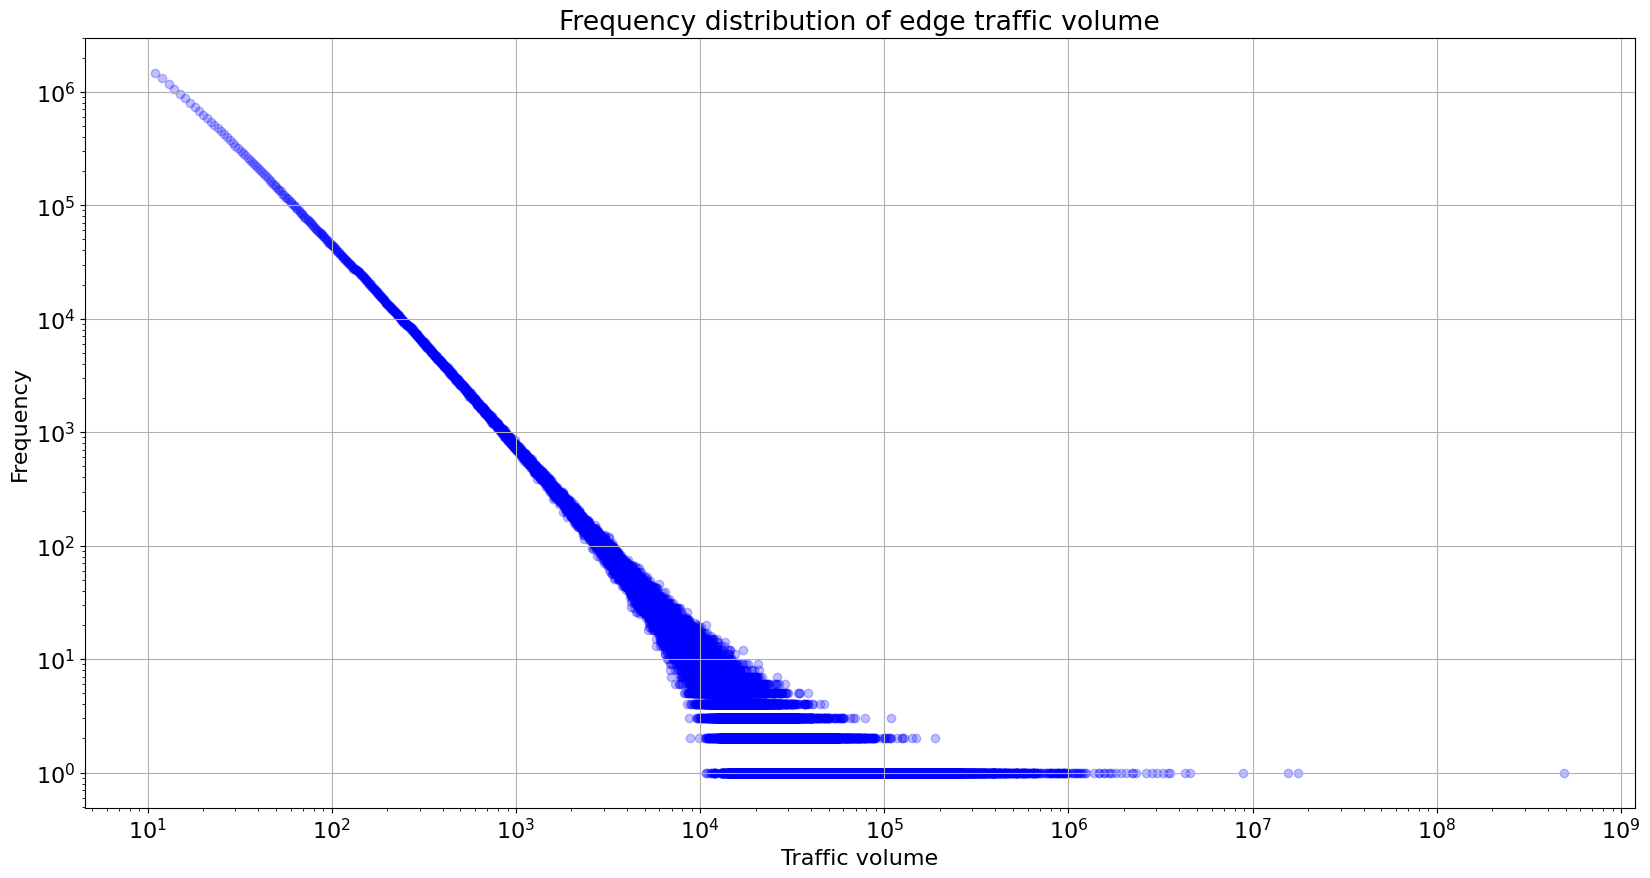

In [15]:
plot_freq_on_log_log_scale(edge_traffic_frequencies, "Frequency distribution of edge traffic volume")

From the descriptive statistics output and the log-log frequency plot above, we can see that the clickstream event traffic volume values do not follow a normal distribution, and the mean and standard deviation are not particularly meaningful here. Instead, the clickstream event traffic volume distribution looks close to a straight line on the log-log frequency plot for lower traffic volume values, and then fans out towards the tail of the distribution with the very high traffic volumes.  


This distribution shape tells us that there are lots of clickstream events with small amount of traffic, and very few clickstream events with very large amounts of traffic.

##### How many articles are there in the dataset?

In [16]:
prev_nodes = set(df["prev"])
curr_nodes = set(df["curr"])

In [17]:
all_nodes = prev_nodes.union(curr_nodes)

In [ ]:
len(all_nodes)

5048081

There are about 5,185,699 articles in the dataset. This means that users have visited (at least 10 times) about 5.2 million articles in the English Wikipedia in 7 months.

In [19]:
len(curr_nodes)

5045758

In [20]:
prev_only_nodes = prev_nodes.difference(curr_nodes)

In [21]:
len(prev_only_nodes)

2328

In [22]:
list(prev_only_nodes)[:10]

['Pitana',
 'Funakoshi',
 'Fiji_language',
 'Grey_Ranks',
 'WOSM',
 'Army_Group_H',
 'Quintus_Volusius_(prefect)',
 'Cleophon',
 'Swiss-German',
 'KESQ']

If we look at the number of articles that are the destinations of clickstream events, the number is lower by 2328. In the complete clickstream data, we would expect that difference to be the count of different external referer types, because every user would have to first get to a Wikipedia article from some external source, so there would be a data row recording the clickstream event of going from an external website to the Wikipedia article. The discrepancy in the number of destination articles is most likely a result of the minimum traffic=10 cutoff in the data.

In [23]:
curr_only_nodes = curr_nodes.difference(prev_nodes)

In [24]:
len(curr_only_nodes)

3409549

In [25]:
list(curr_only_nodes)[:10]

['Hebertshausen',
 'Jean_Pass_(north)',
 'Odisha_Teacher_Eligibility_Test',
 'Chay_Wai_Chuen',
 'Riversdale,_Jamaica',
 'Luis_Lezama',
 'Mesaoria',
 'Falmouth_Foreside,_Maine',
 'Jennifer_Antony',
 'Lanspergius']

In [26]:
3471444/5185704

0.6694257905966094

And if we look at the count of articles that are only destinations in the clickstream events and not referers, we get the number of articles that were looked up by themselves, with no further article browsing on Wikipedia.  
There are 3,471,444 articles like that in the dataset, amounting to 67% of the articles in the data.  
So, of all English Wikipedia articles viewed in June -> December 2018, 67% were accessed from an external source (search, external website link, etc) and followed by the users not continuing to more Wikipedia articles. This suggests that Wikipedia is used an effective reference, where users go to look something up and generally find it right away, without the need for further browsing.  

#### 3.2 Splitting the data by reference type  

The overall dataset should be split up by reference type, because external references are aggregated into general categories of referers, while link and internal search references are pairs of Wikipedia article pages. 

The Wikipedia clickstream dataset is a collection of referer-requested webpage pairs (we'll call these pairs **edges**) with aggregated traffic count for the pair within the given month. These edges are of 3 types in the data: **external**, **link** and **other**. The external type means that the referer webpage is some webpage outside of the English Wikipedia. The **link** and **other** reference types are both for edges connecting Wikipedia articles. The **link** type means that the user followed a link from one Wikipedia article to another. And the **other** type means that the user went from one Wikipedia article to another, but there was no link between them. This happens if the user gets to the second article by searching from the first article, or if the referer is spoofed (according to [the Wikipedia clickstream datasets' format description](https://meta.wikimedia.org/wiki/Research:Wikipedia_clickstream#Format)).

##### Distribution of traffic volume and edge counts across the 3 reference types

In [27]:
# Compute Dask DataFrame to Pandas
summary_by_type = aggregate_edges_by(df, "type")
summary_by_type_pd = summary_by_type.compute() if hasattr(summary_by_type, "compute") else summary_by_type
summary_by_type_pd

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
type,,,,,
external,10584331,5095779353,0.38,0.74,481.45
link,16668389,1706343039,0.59,0.25,102.37
other,904214,59009952,0.03,0.01,65.26


In [28]:
# pickle the output for viz
myoutfile = "en_1218_traffic_summary_by_type.pkl"
with open(myoutfile, 'wb') as picklefile:
    pickle.dump(summary_by_type_pd, picklefile)

print("Pickle created: " + myoutfile)

Pickle created: en_1218_traffic_summary_by_type.pkl


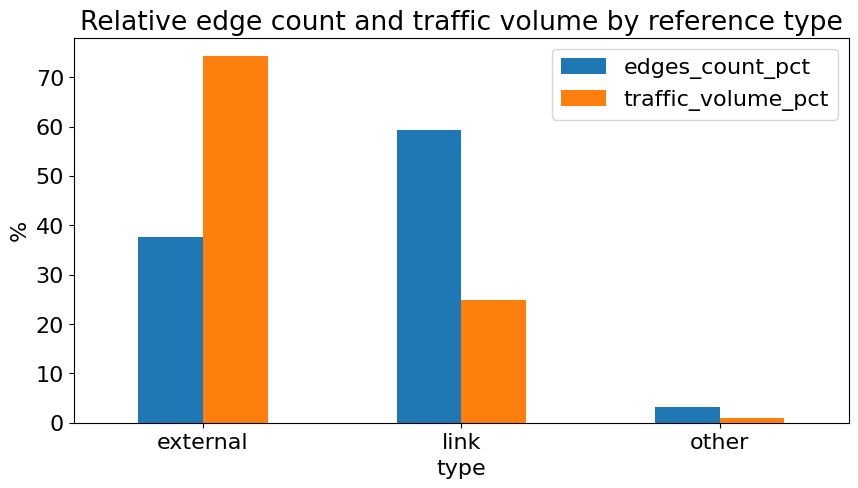

In [29]:
ax = plt.gca()
(summary_by_type_pd[["edges_count_pct", "traffic_volume_pct"]]*100).plot(kind = "bar", ax=ax)
plt.xticks(np.arange(len(summary_by_type_pd.index)), summary_by_type_pd.index, rotation=0)
ax.set_title("Relative edge count and traffic volume by reference type")
ax.set_ylabel("%")

# adjust this fig size
fig = plt.gcf()
fig.set_size_inches(10,5);

74% of all traffic volume on the English Wikipedia during June -> December consists of users going from an external website, search, or app, or having an empty referer, and visiting a page on the English Wikipedia. A quarter of the traffic volume is users following links within the Wikipedia from one article to another. And the remaining 1% of the traffic volume is likely from users visiting Wikipedia articles after searching from within the Wikipedia.

The bar chart above shows a relatively low edges count for reference type=external. This is in part due to the aggregation of external referers into general categories, vs. the 'link' and 'other' reference types having individual webpages for referers.  

Let's plot the edge traffic distributions for each reference type.

In [30]:
external_edges = df[df.type == 'external']
link_edges = df[df.type == 'link']
other_edges = df[df.type == 'other']

In [31]:
# number of terminal nodes in link edges
len(set(link_edges.curr))

2505393

In [32]:
# number of terminal nodes in internal search edges
len(set(other_edges.curr))

384317

In [33]:
external_edges_traffic_frequencies = external_edges.n.value_counts()
link_edges_traffic_frequencies = link_edges.n.value_counts()
other_edges_traffic_frequencies = other_edges.n.value_counts()

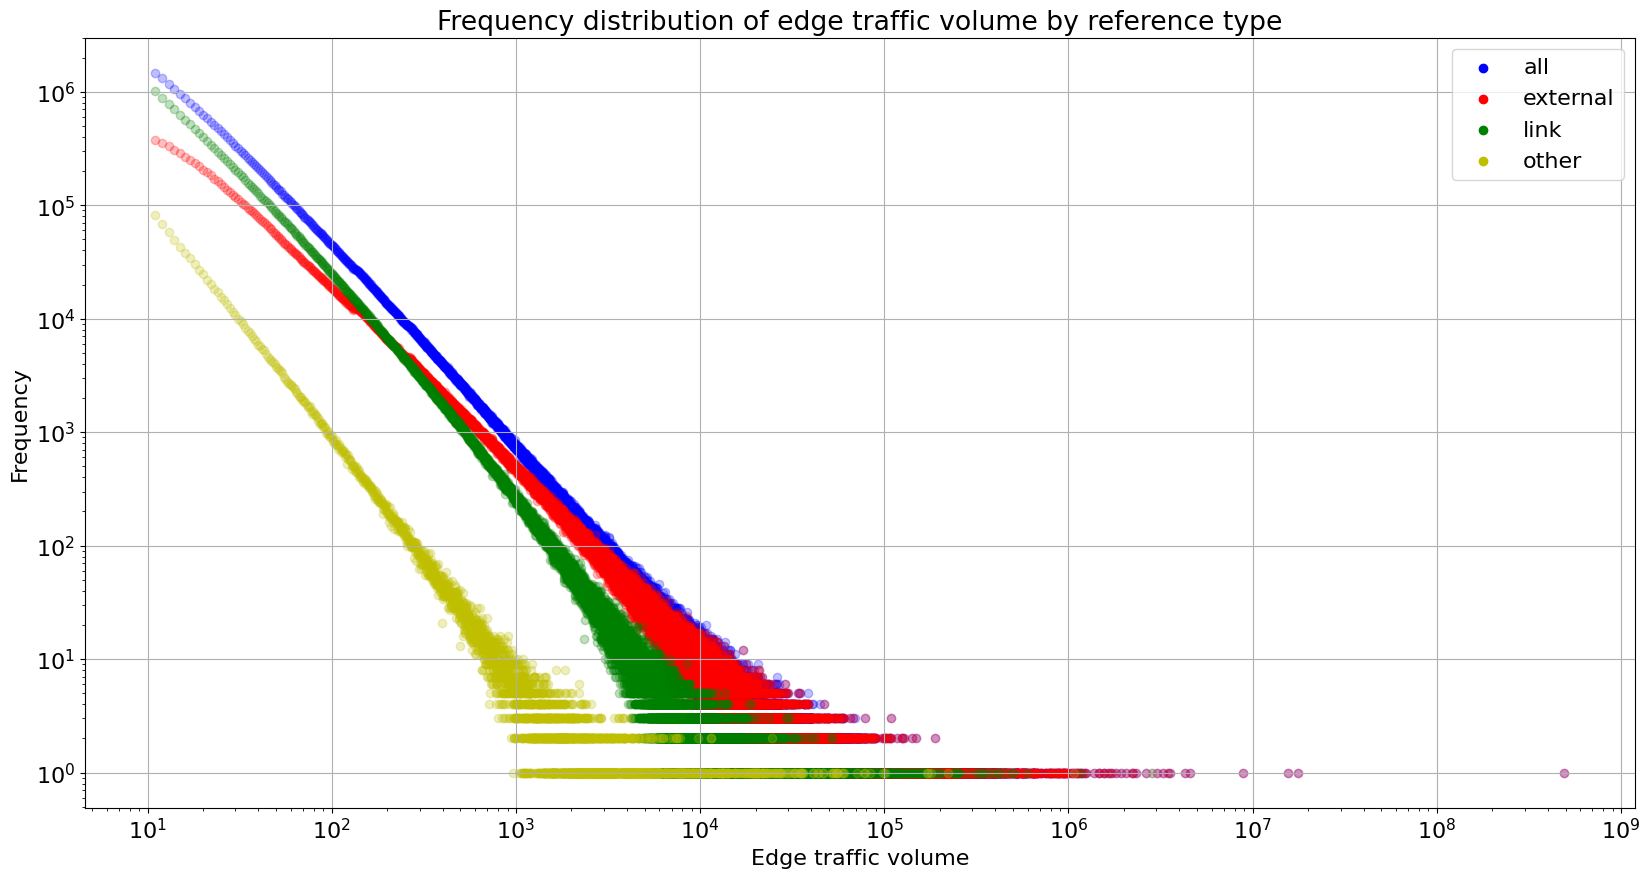

In [34]:
# Compute Dask Series to Pandas
edge_traffic_frequencies = edge_traffic_frequencies.compute() if hasattr(edge_traffic_frequencies, "compute") else edge_traffic_frequencies
external_edges_traffic_frequencies = external_edges_traffic_frequencies.compute() if hasattr(external_edges_traffic_frequencies, "compute") else external_edges_traffic_frequencies
link_edges_traffic_frequencies = link_edges_traffic_frequencies.compute() if hasattr(link_edges_traffic_frequencies, "compute") else link_edges_traffic_frequencies
other_edges_traffic_frequencies = other_edges_traffic_frequencies.compute() if hasattr(other_edges_traffic_frequencies, "compute") else other_edges_traffic_frequencies

# Now plot safely
my_alpha = 0.25
plt.scatter(edge_traffic_frequencies.index.values, edge_traffic_frequencies.values, c="b", label="all", alpha=my_alpha)
plt.scatter(external_edges_traffic_frequencies.index.values, external_edges_traffic_frequencies.values, c="r", label="external", alpha=my_alpha)
plt.scatter(link_edges_traffic_frequencies.index.values, link_edges_traffic_frequencies.values, c="g", label="link", alpha=my_alpha)
plt.scatter(other_edges_traffic_frequencies.index.values, other_edges_traffic_frequencies.values, c="y", label="other", alpha=my_alpha)

plt.xscale("log")
plt.yscale("log")
plt.xlabel('Edge traffic volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Make legend markers opaque
for lh in plt.gca().legend().legend_handles:
    lh.set_alpha(1)

plt.title("Frequency distribution of edge traffic volume by reference type")
plt.show()

The above plot shows a couple of interesting things. It shows that the majority of edges with extremely high traffic volume have external referers. It also shows that the external reference type distribution has a different slope from the other two. The 'link' and 'other' reference type distributions seem to have a very similar slope and shape.

Exploration Index

In [35]:
# Calculate Internal vs External Ratio for Top Articles
total_incoming = df.groupby('curr')['n'].sum().compute()

external_incoming = df[df['type'] == 'external'].groupby('curr')['n'].sum().compute()

# merge and fill NaN with 0 (articles with no external traffic)
ratio_df = pd.DataFrame({'total': total_incoming, 'external': external_incoming}).fillna(0)

ratio_df['external_ratio'] = ratio_df['external'] / ratio_df['total']

# 5. Show "Fact Checkers" (High External) vs "Rabbit Holes" (Low External)
# Filter for significant volume (>10,000 views) to remove noise
significant_pages = ratio_df[ratio_df['total'] > 10000]

print("Top 'Fact-Check' Pages (High External Search Traffic):")
print(significant_pages.sort_values('external_ratio', ascending=False).head(10))

print("\nTop 'Deep-Dive' Pages (High Internal Link Traffic):")
print(significant_pages.sort_values('external_ratio', ascending=True).head(10))

Top 'Fact-Check' Pages (High External Search Traffic):
                                                    total  external  \
curr                                                                  
Bahar_bin_Smith                                     40007  40007.00   
%s                                                  23133  23133.00   
Final_accounts                                      11933  11933.00   
Twentyfour_News                                     10982  10982.00   
ASEA_(American_company)                             10195  10195.00   
Arhaus                                              13312  13312.00   
Karsakpay                                           15949  15949.00   
List_of_Grand_Slam_singles_finals                   14786  14786.00   
Diré                                                16995  16995.00   
Constituency_election_results_in_the_1922_Unite...  16454  16454.00   

                                                    external_ratio  
curr                   

#### 3.3 External reference type  
The external reference type means that the referer is not an article from the English Wikipedia.  

The exact external referer webpages/etc are not specified in the data, and are instead aggregated into 5 categories (as described [here](https://meta.wikimedia.org/wiki/Research:Wikipedia_clickstream#Data_Preparation)):  
- **other-external**: External website referers, i.e. the user went from some external website to a Wikipedia article page.  
- **other-search**: External search referers, i.e. the user searched for something on a search engine page and from there went to a Wikipedia article page.
- **other-internal**: Referers from some other Wikimedia project. It could be a different language Wikipedia or some other Wikimedia project that is not a Wikipedia.
- **other-empty**: An empty referer. This can be the result of a browser homepage setting, a security measure, a bot, etc.
- **other-other**: Any other external referer.  

In [36]:
external_edges.describe(include='all')

,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


In [37]:
external_edges.head(20)

,prev,curr,type,n,month
0,other-empty,2019_Horizon_League_Baseball_Tournament,external,16,12
1,other-search,ForeverAtLast,external,40,12
2,other-empty,ForeverAtLast,external,85,12
6,other-search,Jehangir_Wadia,external,967,12
8,other-empty,Jehangir_Wadia,external,638,12
10,other-internal,Jehangir_Wadia,external,28,12
13,other-other,Jehangir_Wadia,external,24,12
19,other-external,Jehangir_Wadia,external,14,12
22,other-search,Metallate,external,60,12
23,other-empty,Metallate,external,24,12


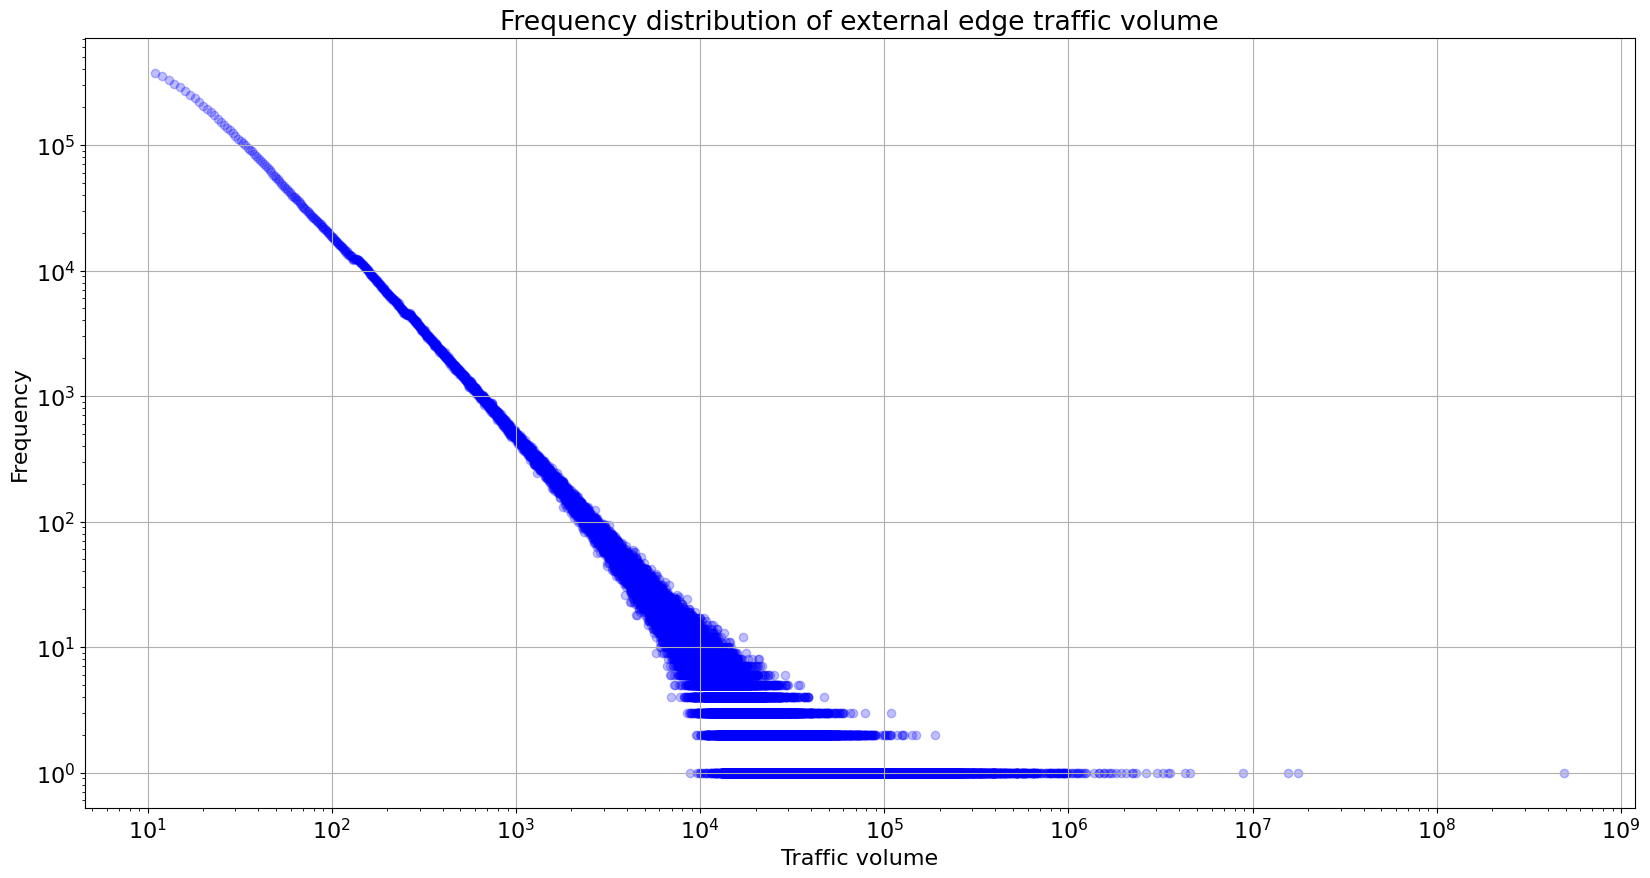

In [38]:
plot_freq_on_log_log_scale(external_edges_traffic_frequencies, 
                           "Frequency distribution of external edge traffic volume")

Splitting out the external reference type edges data, we can see the following in the descriptive stats outputs above:  
- there are 5 referer types in the dataset
- as seen before, there are about 11 million edges with external referer, and the top edge by traffic volume goes from the empty referer to the "Main Page" article. 

##### External referer distributions

In [39]:
summary = aggregate_edges_by(external_edges, "prev")
summary

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
npartitions=1,,,,,
,int64,int32,float64,float64,float64
,...,...,...,...,...


In [40]:
# pickle the output for viz
myoutfile = "en_1218_external_traffic_summary_by_cat.pkl"
with open(myoutfile, 'wb') as picklefile:
    pickle.dump(summary, picklefile)

print("Pickle created: " + myoutfile)

Pickle created: en_1218_external_traffic_summary_by_cat.pkl


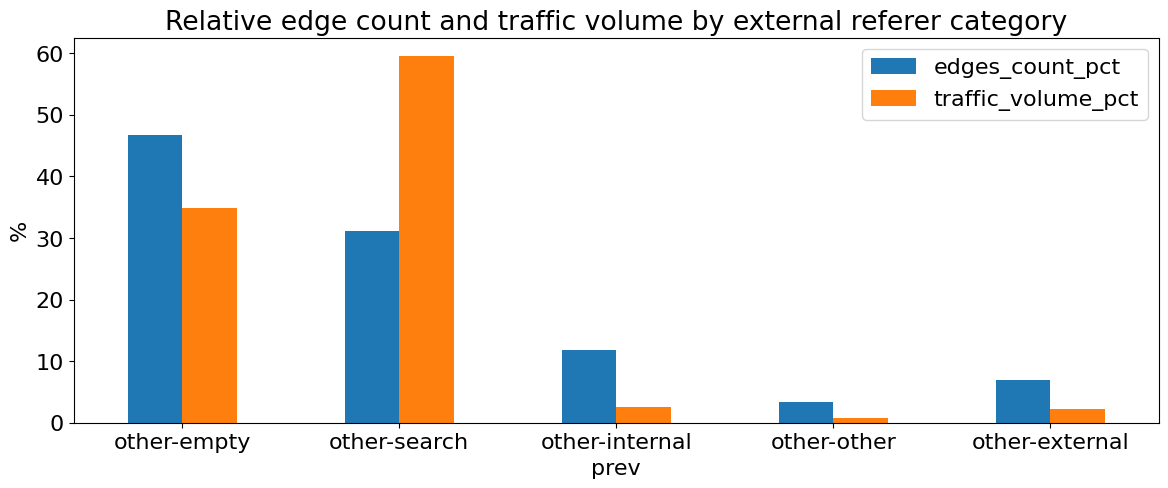

In [41]:
# Compute Dask DataFrame to Pandas
summary_pd = summary.compute() if hasattr(summary, "compute") else summary

# Plot
ax = plt.gca()
(summary_pd[["edges_count_pct", "traffic_volume_pct"]] * 100).plot(kind="bar", ax=ax)
plt.xticks(np.arange(len(summary_pd.index)), summary_pd.index, rotation=0)
ax.set_title("Relative edge count and traffic volume by external referer category")
ax.set_ylabel("%")

# Adjust figure size
fig = plt.gcf()
fig.set_size_inches(14, 5)
plt.show()

About 59% of external traffic to English Wikipedia is coming from search engine websites, 35% from empty referers, and the remaining 6% is from other external websites, other Wikimedia domains, etc.  
While external search has the most traffic volume, it results if fewer articles visted than empty referer traffic. This means that while search engines bring the most traffic to Wikipedia, people tend to search for the same things. Empty referer Wikipedia visitors cover a wider range of Wikipedia articles.

In [42]:
external_websites_edges = external_edges[external_edges.prev == 'other-external']
external_search_edges = external_edges[external_edges.prev == 'other-search']
other_wikimedia_edges = external_edges[external_edges.prev == 'other-internal']
empty_referer_edges = external_edges[external_edges.prev == 'other-empty']
external_other_edges = external_edges[external_edges.prev == 'other-other']

external_websites_edges.name = "external_websites"
external_search_edges.name = "external_search"
other_wikimedia_edges.name = "other_wikimedia"
empty_referer_edges.name = "empty_referer"
external_other_edges.name = "external_other"

In [43]:
external_edges_freq_dict = {}
external_edges_list = \
    [external_websites_edges, external_search_edges, other_wikimedia_edges, empty_referer_edges, external_other_edges]
for e in external_edges_list:
    external_edges_freq_dict[e.name] = e.n.value_counts()

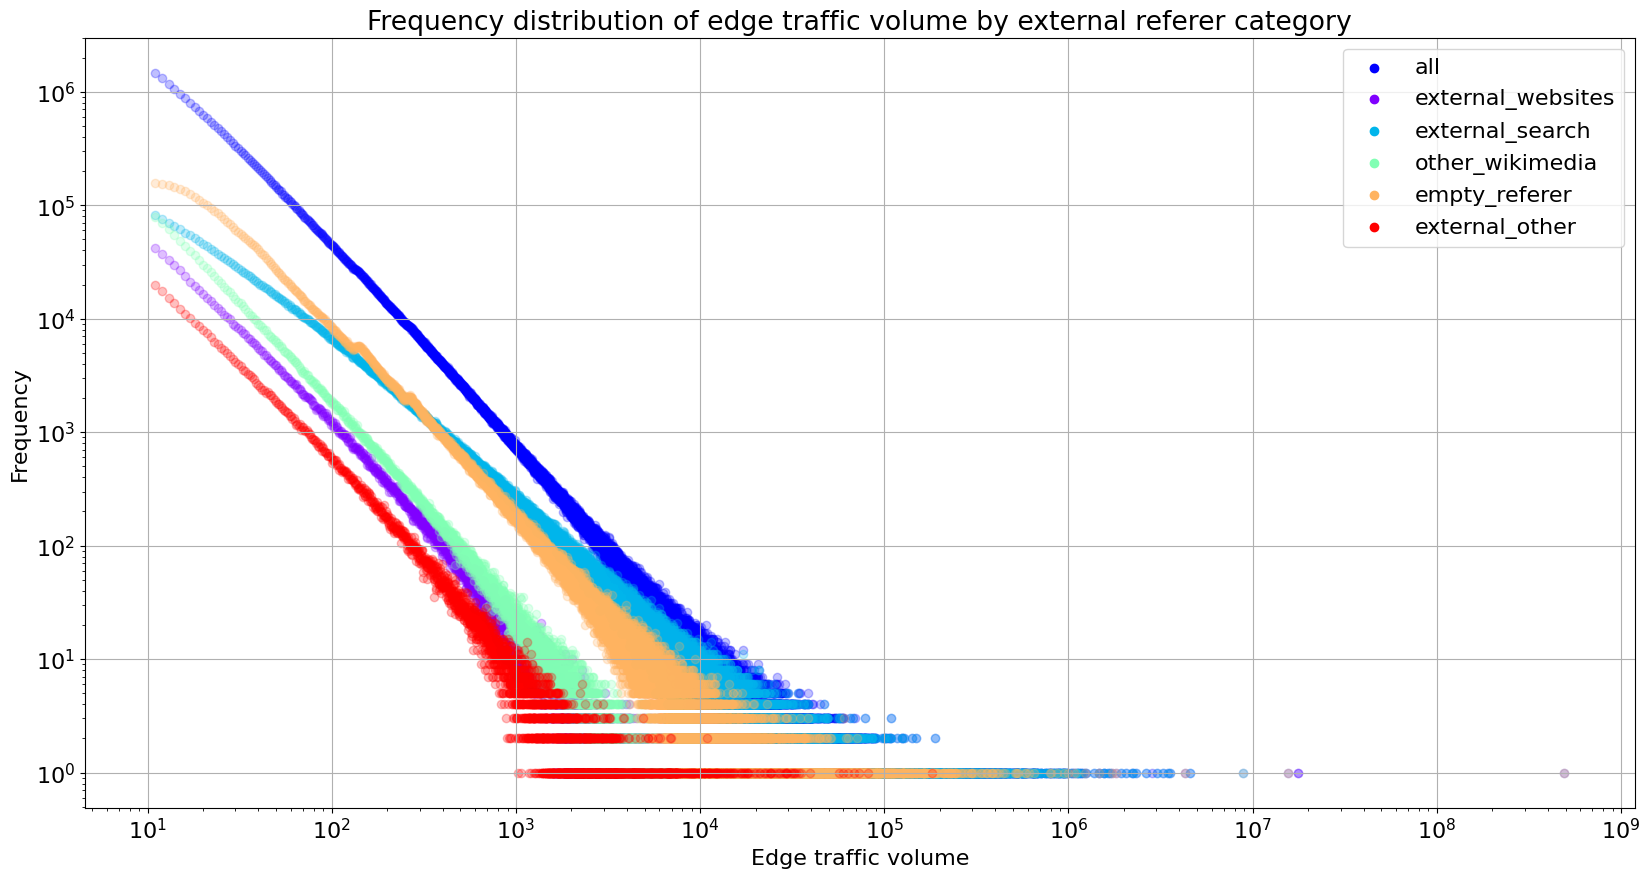

In [44]:
my_alpha = 0.25
colors = matplotlib.cm.rainbow(np.linspace(0, 1, 5))
i = 0

# Convert edge_traffic_frequencies to Pandas if it's Dask
edge_traffic_frequencies_pd = edge_traffic_frequencies.compute() if hasattr(edge_traffic_frequencies, "compute") else edge_traffic_frequencies

plt.scatter(
    edge_traffic_frequencies_pd.index.values,
    edge_traffic_frequencies_pd.values,
    c="b",
    label="all",
    alpha=my_alpha
)

for key in external_edges_freq_dict:
    # Convert each Dask Series to Pandas
    series_pd = external_edges_freq_dict[key].compute() if hasattr(external_edges_freq_dict[key], "compute") else external_edges_freq_dict[key]
    
    plt.scatter(
        series_pd.index.values,
        series_pd.values,
        c=[colors[i]],
        label=key,
        alpha=my_alpha
    )
    i += 1

plt.xscale("log")
plt.yscale("log")
plt.xlabel('Edge traffic volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# Make the legend markers opaque
for lh in plt.gca().legend().legend_handles:
    lh.set_alpha(1)

plt.title("Frequency distribution of edge traffic volume by external referer category")
plt.show()

The external traffic volume distributions above show that the external search traffic volume distribution has a significantly more gradual slope than the distributions of other referer types. High traffic volume edges tend to be from external search, while there is a higher frequency of lower traffic volume edges coming from empty referer.

##### Distribution and top edge lists for each external referer category

In [45]:
for e in external_edges_list:
    print("External referer category:", e.name)
    print("Descriptive stats")
    display(e.describe(include='all'))
    print("Top 20 observations")
    display(e.head(20))
    print("=====================")

External referer category: external_websites
Descriptive stats


,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


Top 20 observations


,prev,curr,type,n,month
19,other-external,Jehangir_Wadia,external,14,12
43,other-external,Flour_bleaching_agent,external,33,12
63,other-external,American_Society_of_Magazine_Editors,external,13,12
73,other-external,5.11_Tactical,external,49,12
115,other-external,Delayed_puberty,external,61,12
199,other-external,"Charles_Frederick,_Duke_of_Holstein-Gottorp",external,22,12
252,other-external,Chaplet_(prayer),external,15,12
275,other-external,Special_adviser_(UK),external,25,12
293,other-external,"I_Vow_to_Thee,_My_Country",external,154,12
306,other-external,EXeLearning,external,30,12


External referer category: external_search
Descriptive stats


,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


Top 20 observations


,prev,curr,type,n,month
1,other-search,ForeverAtLast,external,40,12
6,other-search,Jehangir_Wadia,external,967,12
22,other-search,Metallate,external,60,12
24,other-search,Bob_Hammond,external,60,12
28,other-search,Himad_Abdelli,external,56,12
32,other-search,Flour_bleaching_agent,external,1987,12
47,other-search,Pax_Britannica_Trilogy,external,180,12
52,other-search,American_Society_of_Magazine_Editors,external,46,12
64,other-search,5.11_Tactical,external,4810,12
74,other-search,HFI,external,129,12


External referer category: other_wikimedia
Descriptive stats


,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


Top 20 observations


,prev,curr,type,n,month
10,other-internal,Jehangir_Wadia,external,28,12
35,other-internal,Flour_bleaching_agent,external,24,12
54,other-internal,American_Society_of_Magazine_Editors,external,31,12
68,other-internal,5.11_Tactical,external,132,12
95,other-internal,Delayed_puberty,external,128,12
119,other-internal,Truth_and_Justice,external,23,12
131,other-internal,Heart_of_Glass_(film),external,45,12
140,other-internal,Whitby_railway_station,external,12,12
160,other-internal,The_Reaper_(Miró_painting),external,11,12
190,other-internal,"Charles_Frederick,_Duke_of_Holstein-Gottorp",external,76,12


External referer category: empty_referer
Descriptive stats


,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


Top 20 observations


,prev,curr,type,n,month
0,other-empty,2019_Horizon_League_Baseball_Tournament,external,16,12
2,other-empty,ForeverAtLast,external,85,12
8,other-empty,Jehangir_Wadia,external,638,12
23,other-empty,Metallate,external,24,12
25,other-empty,Bob_Hammond,external,35,12
26,other-empty,Linburn_Centre,external,12,12
27,other-empty,Shamsuddin_Amiri,external,19,12
29,other-empty,Himad_Abdelli,external,36,12
34,other-empty,Flour_bleaching_agent,external,400,12
48,other-empty,Pax_Britannica_Trilogy,external,27,12


External referer category: external_other
Descriptive stats


,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


Top 20 observations


,prev,curr,type,n,month
13,other-other,Jehangir_Wadia,external,24,12
37,other-other,Flour_bleaching_agent,external,37,12
70,other-other,5.11_Tactical,external,25,12
100,other-other,Delayed_puberty,external,27,12
176,other-other,Anti_Terrorism_Court_of_Pakistan,external,12,12
265,other-other,Special_adviser_(UK),external,11,12
286,other-other,"I_Vow_to_Thee,_My_Country",external,112,12
410,other-other,Pattern_recognition_(psychology),external,44,12
527,other-other,Jew_(word),external,35,12
647,other-other,The_Client_List_(TV_series),external,84,12


#### 3.4 Link reference type  

Link reference type represents clickstream events where users go from one English Wikipedia article to another. Chains of these clickstream events can reveal browsing and research behavior patterns on Wikipedia.

In [46]:
link_edges.describe(include='all')

,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


In [47]:
link_edges.head(20)

,prev,curr,type,n,month
3,First_Families_of_Pakistan,Jehangir_Wadia,link,19,12
4,"The_Lawrence_School,_Sanawar",Jehangir_Wadia,link,36,12
5,Wadia_family,Jehangir_Wadia,link,715,12
7,Ness_Wadia,Jehangir_Wadia,link,494,12
9,GoAir,Jehangir_Wadia,link,1191,12
11,Lovji_Nusserwanjee_Wadia,Jehangir_Wadia,link,23,12
12,Sangh_Parivar,Jehangir_Wadia,link,25,12
14,Parsi,Jehangir_Wadia,link,17,12
15,Bombay_Dyeing,Jehangir_Wadia,link,102,12
16,Wadia_Group,Jehangir_Wadia,link,138,12


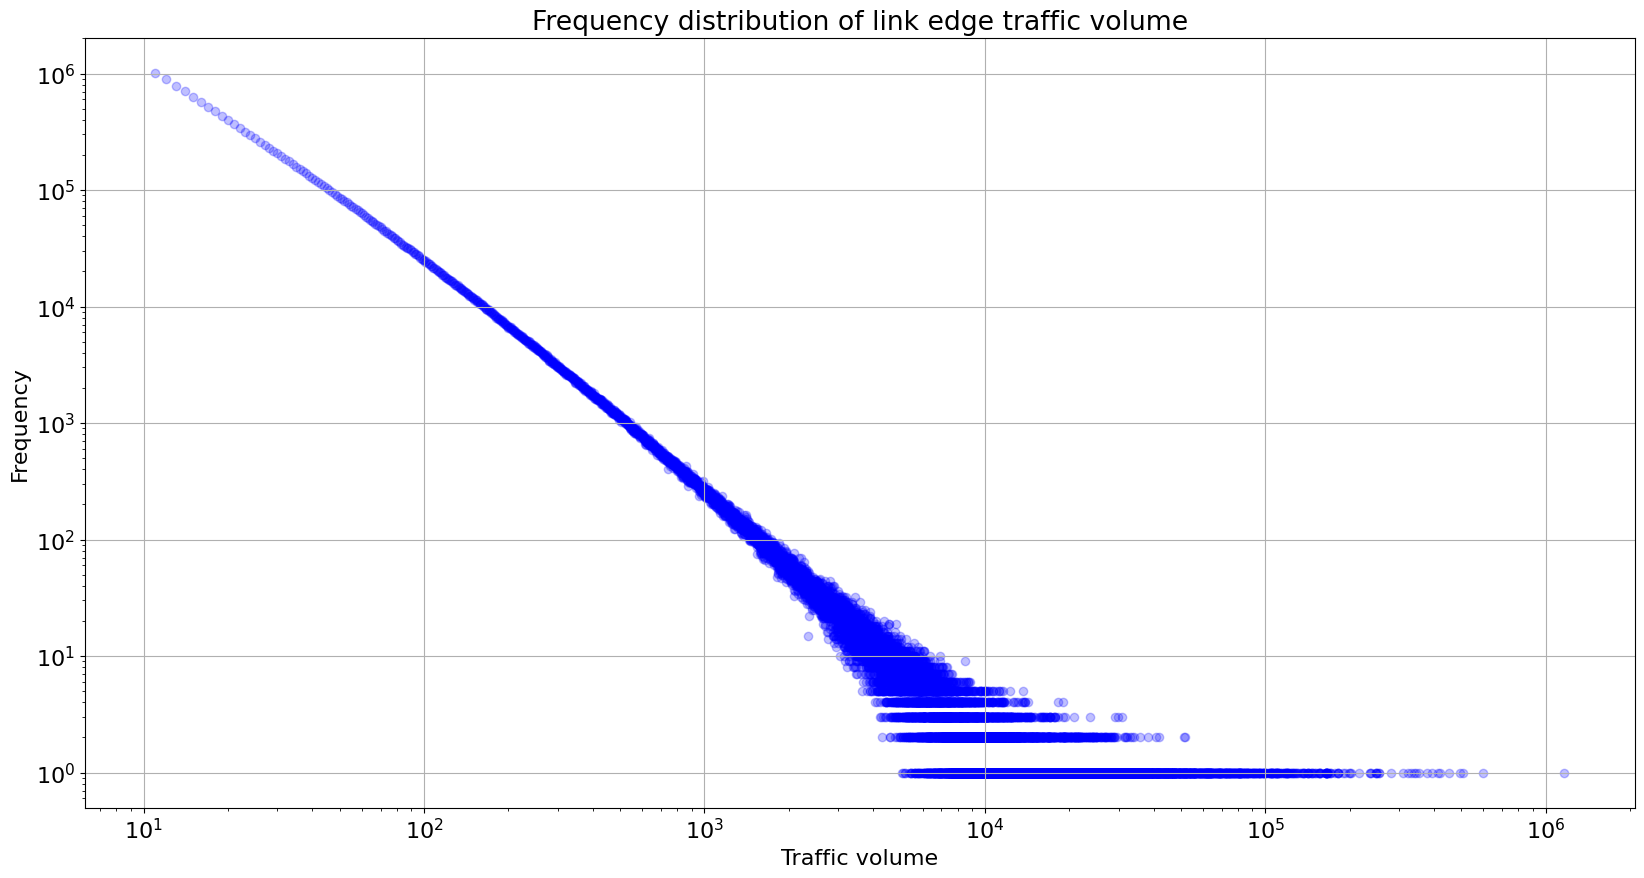

In [48]:
plot_freq_on_log_log_scale(link_edges_traffic_frequencies, 
                           "Frequency distribution of link edge traffic volume")

From the link edges descriptive stats above, we can note the following:  
- there are 17.9 million link edges in the dataset  
- the linked clickstream event with the highest traffic volume goes from "Jason Momoa" to "Lisa Bonet"  
- the "New York City" article has the most links traversed from it: users followed links to 2,224 articles from the "New York City" Wikipedia article  
- the "United States" article has the most links traversed to it: users followed links from 6,368 articles to the "United States" Wikipedia article


##### The "Main Page" Wikipedia article  

The "Main Page" Wikipedia article serves a different function from a typical Wikipedia article, linking together articles about current event, historical anniversaries, random trivia, etc. The clickstream data to/from the "Main Page" article represent a different kind of user behavior in the clickstream data than user browsing through topic-specific articles. For graph analytics we'll conduct later, the "Main Page" article clickstream connections are likely to overconnect the network and make it difficult to identify article topic clusters.  

However, it is still interesting to take a look at the top traffic links to/from "Main Page".  

###### Outgoing links from the "Main Page" article

In [49]:
test1 = link_edges[link_edges.prev=="Main_Page"]

In [50]:
len(test1)

73

In [51]:
test1.head(20)

,prev,curr,type,n,month
105982,Main_Page,Coral_reef,link,124,12
182054,Main_Page,Grammy_Award,link,2387,12
571487,Main_Page,Tony_Award,link,131,12
962830,Main_Page,Melissa_Clark,link,12,12
1045246,Main_Page,Dismemberment,link,20,12
1445016,Main_Page,Biographical_film,link,69,12
1837974,Main_Page,Great_Belt_Fixed_Link,link,11,12
2311102,Main_Page,Bradley_Cooper,link,1905,12


The link with the highest traffic coming from the "Main Page" is to the "Wikipedia" article, and there are a few more Wikipedia-specific articles on the top traffic list for out-links from the "Main Page" article.  
The top non-Wikipedia-focused articles by traffic are mostly about NASA, sports, historical figures, celebrities, etc.

###### Incoming links to the "Main Page" article

In [52]:
test2 = link_edges[link_edges.curr=="Main_Page"]

In [53]:
len(test2)

13

In [54]:
test2

,prev,curr,type,n,month
npartitions=13,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


All incoming links to the "Main Page" Wikipedia article in the dataset are mostly from articles about Wikipedia.

##### Link hubs  

In a network, hubs are the starting nodes of edges that have high counts of emerging edges.  
In the clickstream edges data, articles are the nodes, and articles that have high counts of outgoing traffic edges are the hubs. 

In [55]:
link_start_nodes = aggregate_edges_by(link_edges, "prev")
link_start_nodes.sort_values("traffic_volume", ascending=False, inplace=True)
link_start_nodes.describe()

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
npartitions=1,,,,,
,float64,float64,float64,float64,float64
,...,...,...,...,...


There are about 1.7 million articles with links followed by users to other articles. The average number of outgoing followed links from a Wikipedia article is 10, with the average traffic volume of 9,291. But, like the link edges distribution, the outgoing edge counts distribution is far from normal and is closer to a power law distribution, and so most outgoing edge count are much less than 10, with a few highly linked articles inflating the averages.  
Looking at the quartiles, we can see that half of the articles have at most 3 outgoing followed links to other articles.

###### Hubs by outgoing traffic volume

In [56]:
pd.options.display.float_format = '{:.4f}'.format

link_start_nodes_pd = link_start_nodes.compute()
link_start_nodes_pd.head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
prev,,,,,
First_Families_of_Pakistan,16,344,0.0000,0.0000,21.5000
"The_Lawrence_School,_Sanawar",71,3503,0.0000,0.0000,49.3380
Wadia_family,30,8784,0.0000,0.0000,292.8000
Ness_Wadia,27,7744,0.0000,0.0000,286.8148
GoAir,58,7563,0.0000,0.0000,130.3966
Lovji_Nusserwanjee_Wadia,9,430,0.0000,0.0000,47.7778
Sangh_Parivar,47,2877,0.0000,0.0000,61.2128
Parsi,142,39038,0.0000,0.0000,274.9155
Bombay_Dyeing,11,1339,0.0000,0.0000,121.7273


The top hub articles by traffic volume listing above shows that the articles with the highest outgoing traffic do not have the most outgoing links, nor do they have the highest average outgoing traffic per edge.  
The top hub articles by traffic volume are mostly about celebrities, movies, music bands, etc.

In [57]:
link_start_nodes_traffic_freq = link_start_nodes.traffic_volume.value_counts()

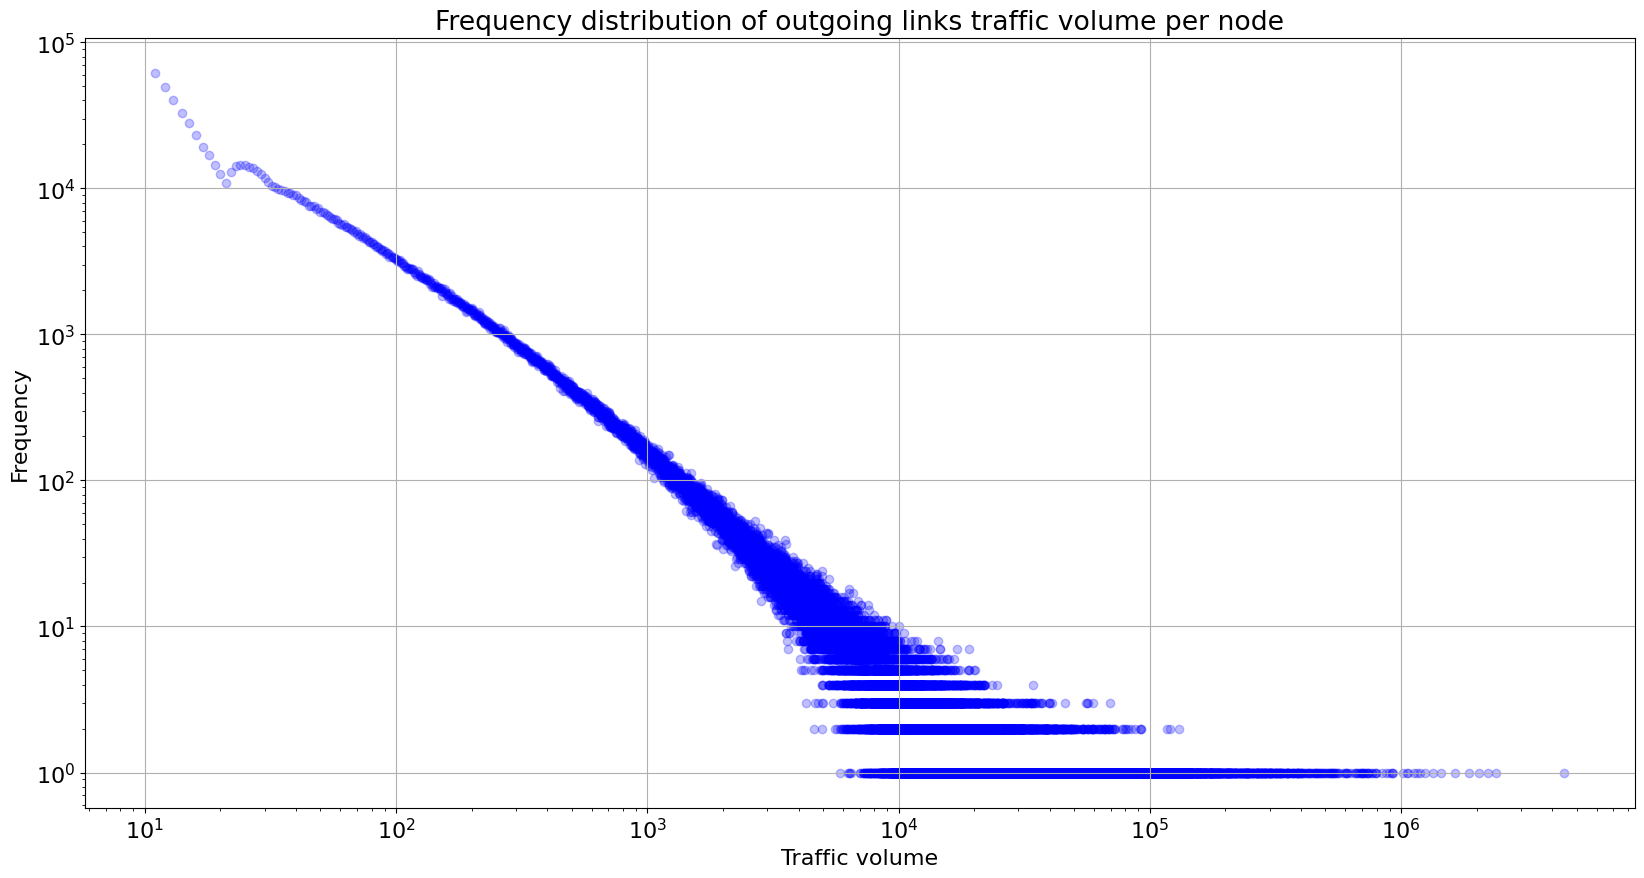

In [58]:
plot_freq_on_log_log_scale(link_start_nodes_traffic_freq, 
                           "Frequency distribution of outgoing links traffic volume per node")

###### Hubs by outgoing edge count

In [59]:
link_start_nodes.sort_values("edges_count", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
prev,,,,,
New_York_City,2181,196083,0.0001,0.0001,89.9051
London,2057,169986,0.0001,0.0001,82.6378
William_Shakespeare,2043,231056,0.0001,0.0001,113.0964
California,2004,135022,0.0001,0.0001,67.3762
Russia,1947,224173,0.0001,0.0001,115.1376
France,1844,173674,0.0001,0.0001,94.1833
United_States,1814,557649,0.0001,0.0003,307.4140
Paris,1792,106756,0.0001,0.0001,59.5737
Massachusetts,1743,88868,0.0001,0.0001,50.9857


The top hub articles by outgoing edge count are mostly countries, cities and states.

In [60]:
link_start_nodes_edge_counts_freq = link_start_nodes.edges_count.value_counts()

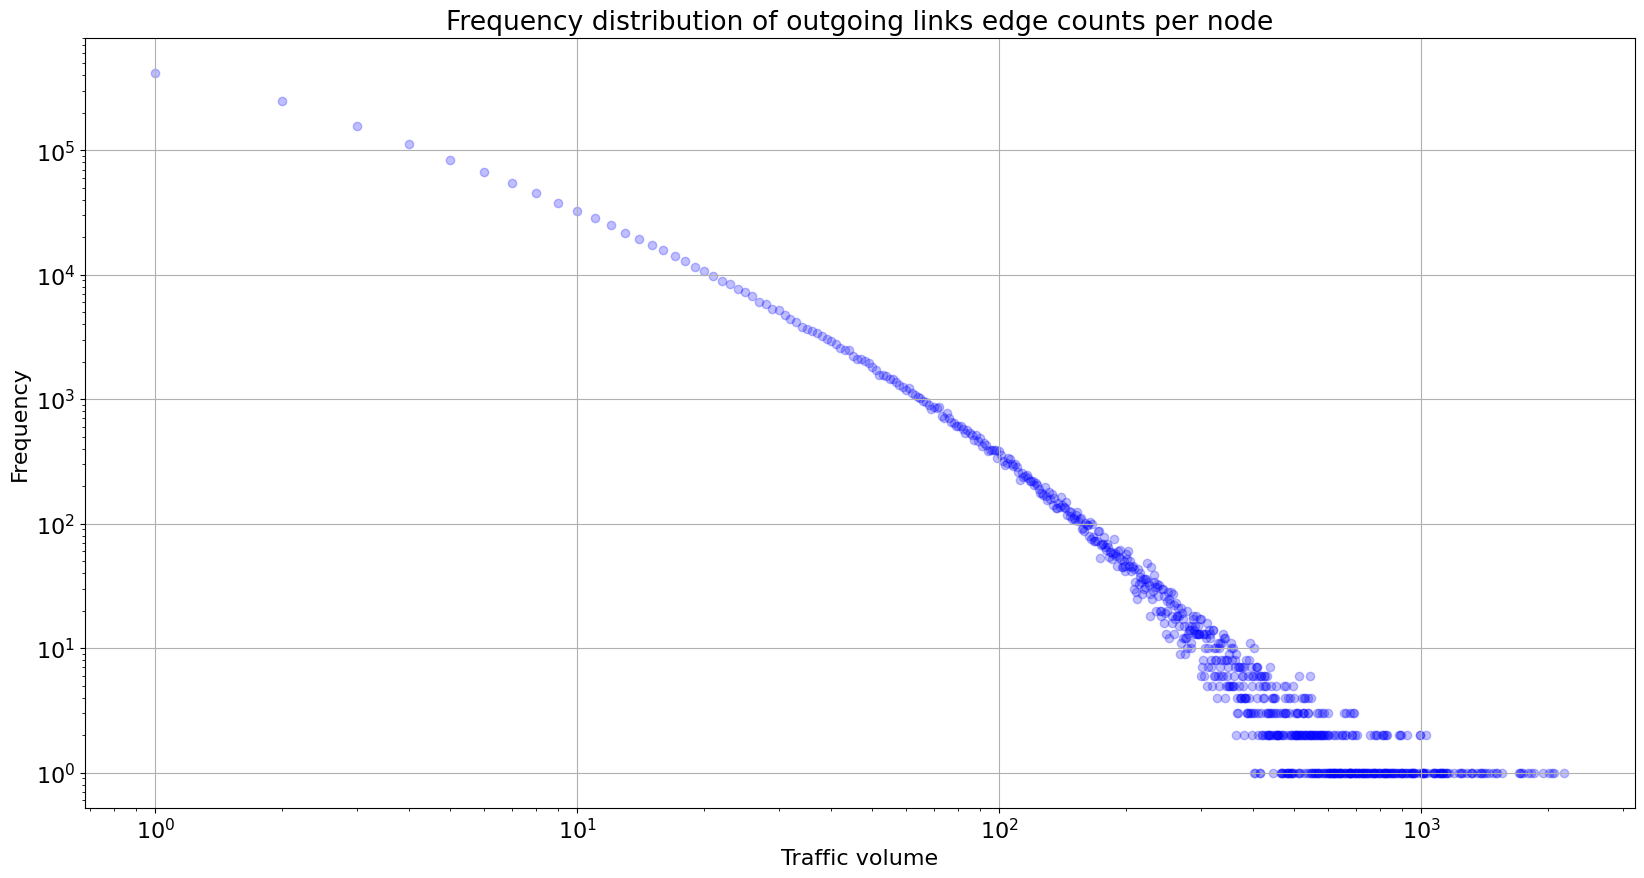

In [61]:
plot_freq_on_log_log_scale(link_start_nodes_edge_counts_freq, 
                           "Frequency distribution of outgoing links edge counts per node")

###### Hubs by outgoing traffic average per edge

In [62]:
link_start_nodes.sort_values("traffic_avg", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
prev,,,,,
Bird_Box_(film),67,2042949,0.0000,0.0012,30491.7761
NetScout_Systems,6,164479,0.0000,0.0001,27413.1667
Bird_Box,30,737163,0.0000,0.0004,24572.1000
Jason_Momoa,96,2226611,0.0000,0.0013,23193.8646
Marwencol,3,64645,0.0000,0.0000,21548.3333
Article_13,2,39465,0.0000,0.0000,19732.5000
Lists_of_people_who_disappeared,9,139415,0.0000,0.0001,15490.5556
Emily_Atack,45,614814,0.0000,0.0004,13662.5333
Exo_(band),127,1639684,0.0000,0.0010,12910.8976


In [63]:
link_start_nodes_traffic_avg_freq = np.floor(link_start_nodes.traffic_avg).value_counts()

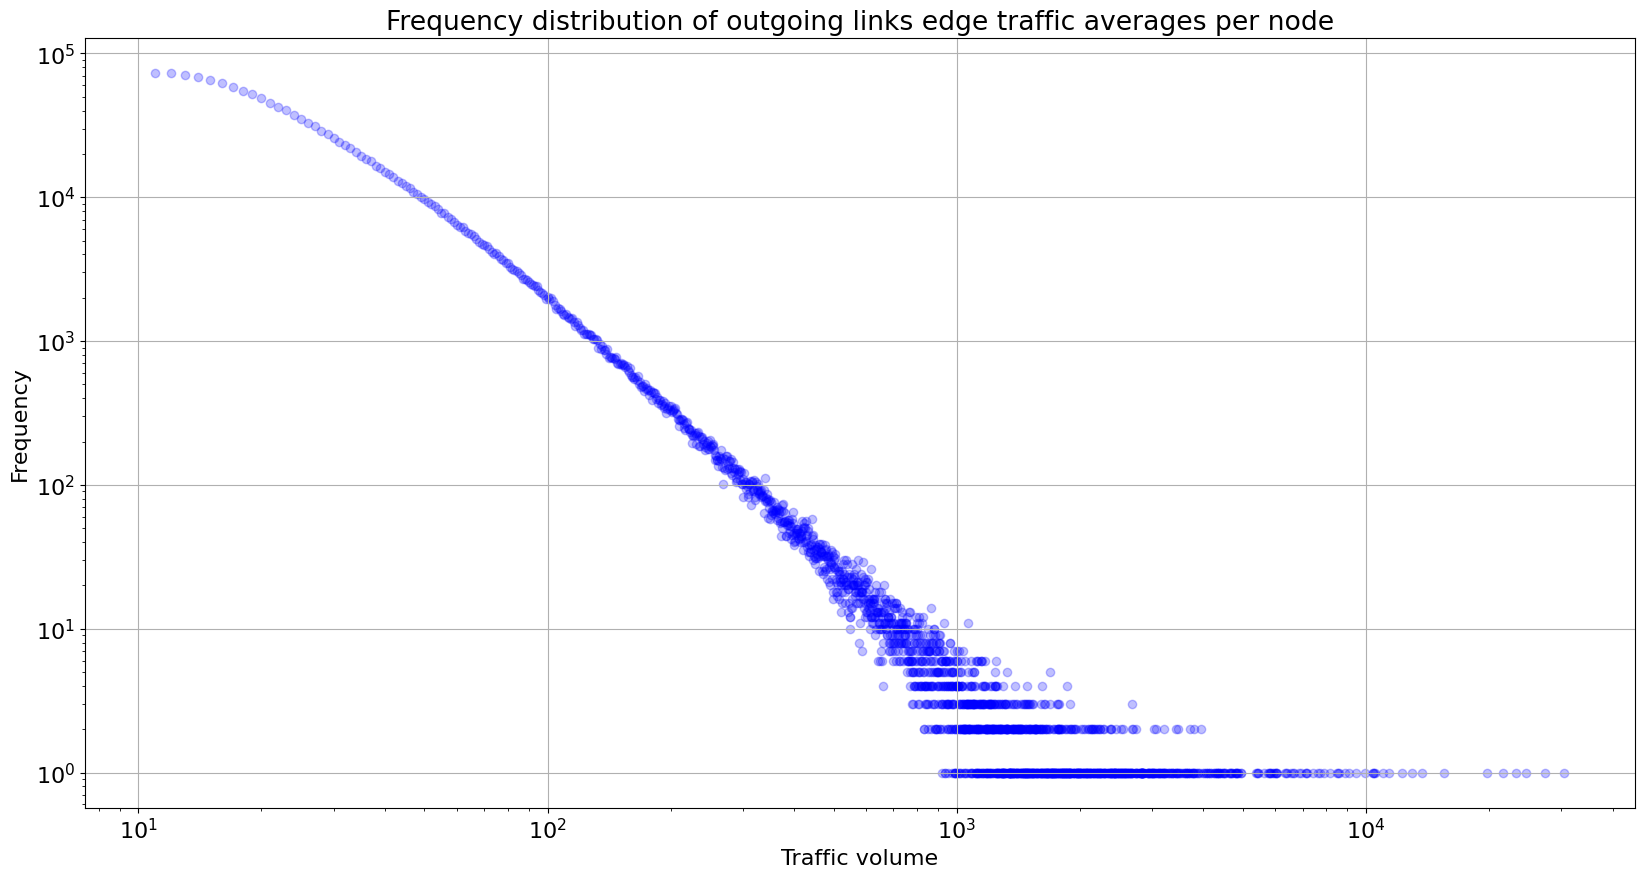

In [64]:
plot_freq_on_log_log_scale(link_start_nodes_traffic_avg_freq, 
                           "Frequency distribution of outgoing links edge traffic averages per node")

##### Link authorities  

In a network, authorities are the terminal nodes of edges that have high counts of incoming edges.
In the clickstream edges data, the articles that have high counts of incoming traffic edges are the authorities.

In [65]:
link_end_nodes = aggregate_edges_by(link_edges, "curr")
link_end_nodes = link_end_nodes.compute()
link_end_nodes.sort_values("traffic_volume", ascending=False, inplace=True)
link_end_nodes.describe()

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
count,2505393.0000,2505393.0000,2505393.0000,2505393.0000,2505393.0000
mean,6.6530,681.0680,0.0000,0.0000,69.5034
std,19.6262,4096.6949,0.0000,0.0000,371.8148
min,1.0000,11.0000,0.0000,0.0000,11.0000
25%,1.0000,28.0000,0.0000,0.0000,19.0000
50%,2.0000,84.0000,0.0000,0.0000,32.0000
75%,6.0000,316.0000,0.0000,0.0000,61.4211
max,5819.0000,1216994.0000,0.0003,0.0007,202678.0000


###### Authorities by incoming traffic volume

In [66]:
link_end_nodes.head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
curr,,,,,
Lisa_Bonet,52,1216994,0.0000,0.0007,23403.7308
George_H._W._Bush,899,1107619,0.0001,0.0006,1232.0567
George_W._Bush,932,907153,0.0001,0.0005,973.3401
Nick_Jonas,144,776231,0.0000,0.0005,5390.4931
Bird_Box_(film),42,682992,0.0000,0.0004,16261.7143
Jason_Momoa,90,639343,0.0000,0.0004,7103.8111
Dorothy_Bush_Koch,34,605207,0.0000,0.0004,17800.2059
Avengers:_Endgame,224,603852,0.0000,0.0004,2695.7679
Zoë_Kravitz,88,598613,0.0000,0.0004,6802.4205


It looks like most of the top authority articles by incoming traffic volume are about famous people.

In [67]:
link_end_nodes_traffic_freq = link_end_nodes.traffic_volume.value_counts()

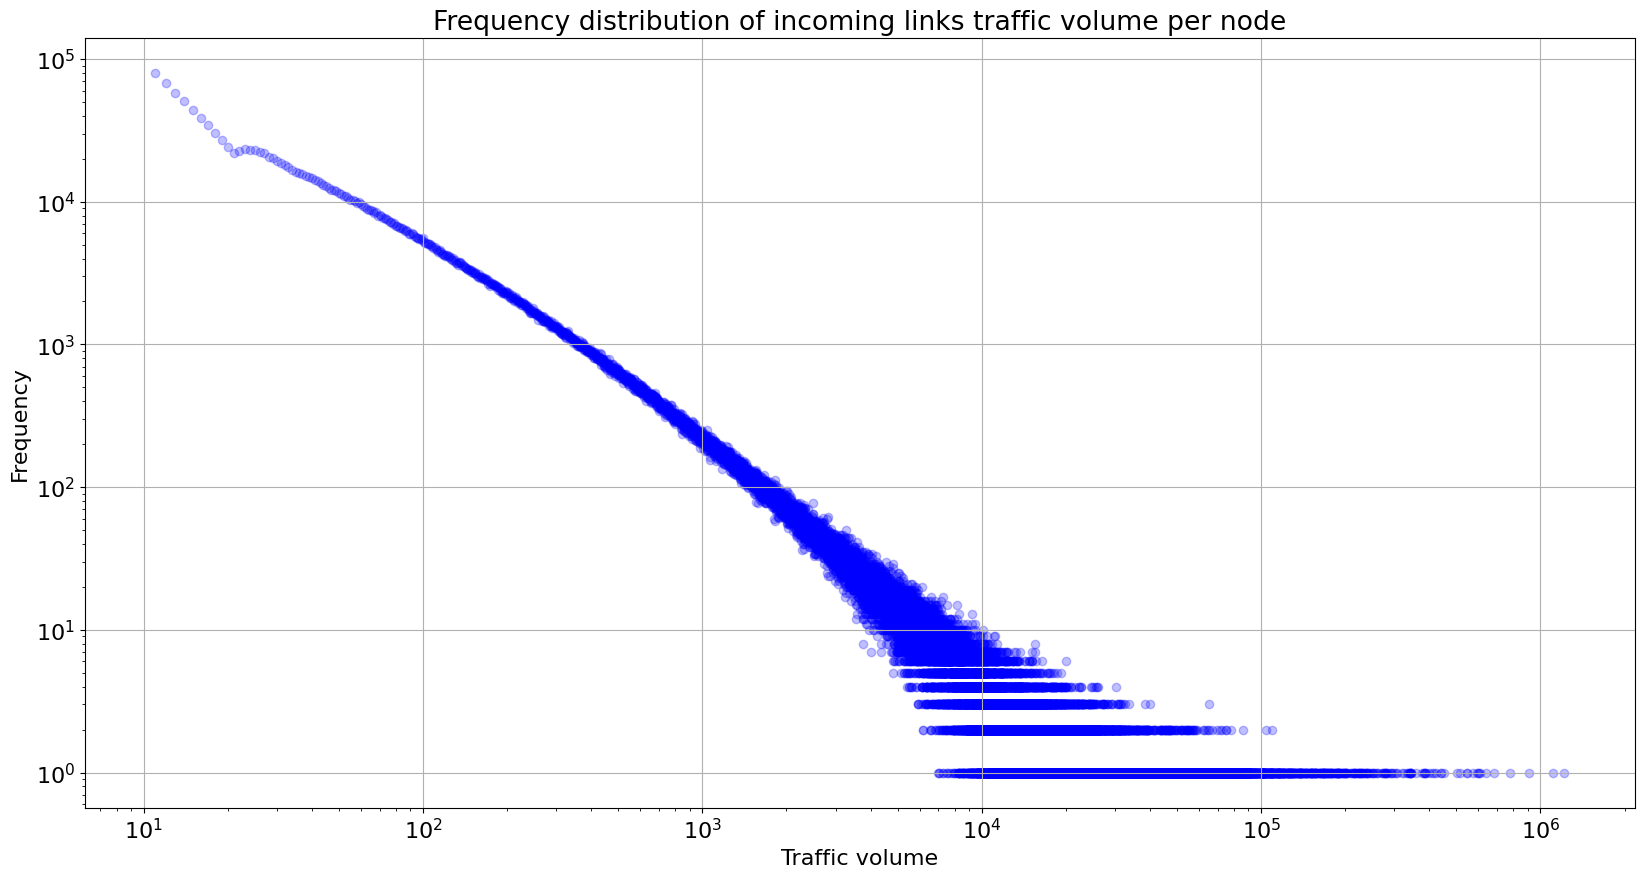

In [68]:
plot_freq_on_log_log_scale(link_end_nodes_traffic_freq, 
                           "Frequency distribution of incoming links traffic volume per node")

###### Authorities by incoming edges count

In [69]:
link_end_nodes.sort_values("edges_count", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
curr,,,,,
United_States,5819,397857,0.0003,0.0002,68.3721
India,3506,200041,0.0002,0.0001,57.0568
United_Kingdom,2882,225729,0.0002,0.0001,78.3237
World_War_II,2344,143644,0.0001,0.0001,61.2816
YouTube,2168,130403,0.0001,0.0001,60.1490
New_York_City,2147,140668,0.0001,0.0001,65.5184
Los_Angeles,1897,91201,0.0001,0.0001,48.0764
China,1861,127417,0.0001,0.0001,68.4670
Order_of_the_British_Empire,1820,345132,0.0001,0.0002,189.6330


Most authority articles by incoming edge count are countries, states and cities.

In [70]:
link_end_nodes_edge_counts_freq = link_end_nodes.edges_count.value_counts()

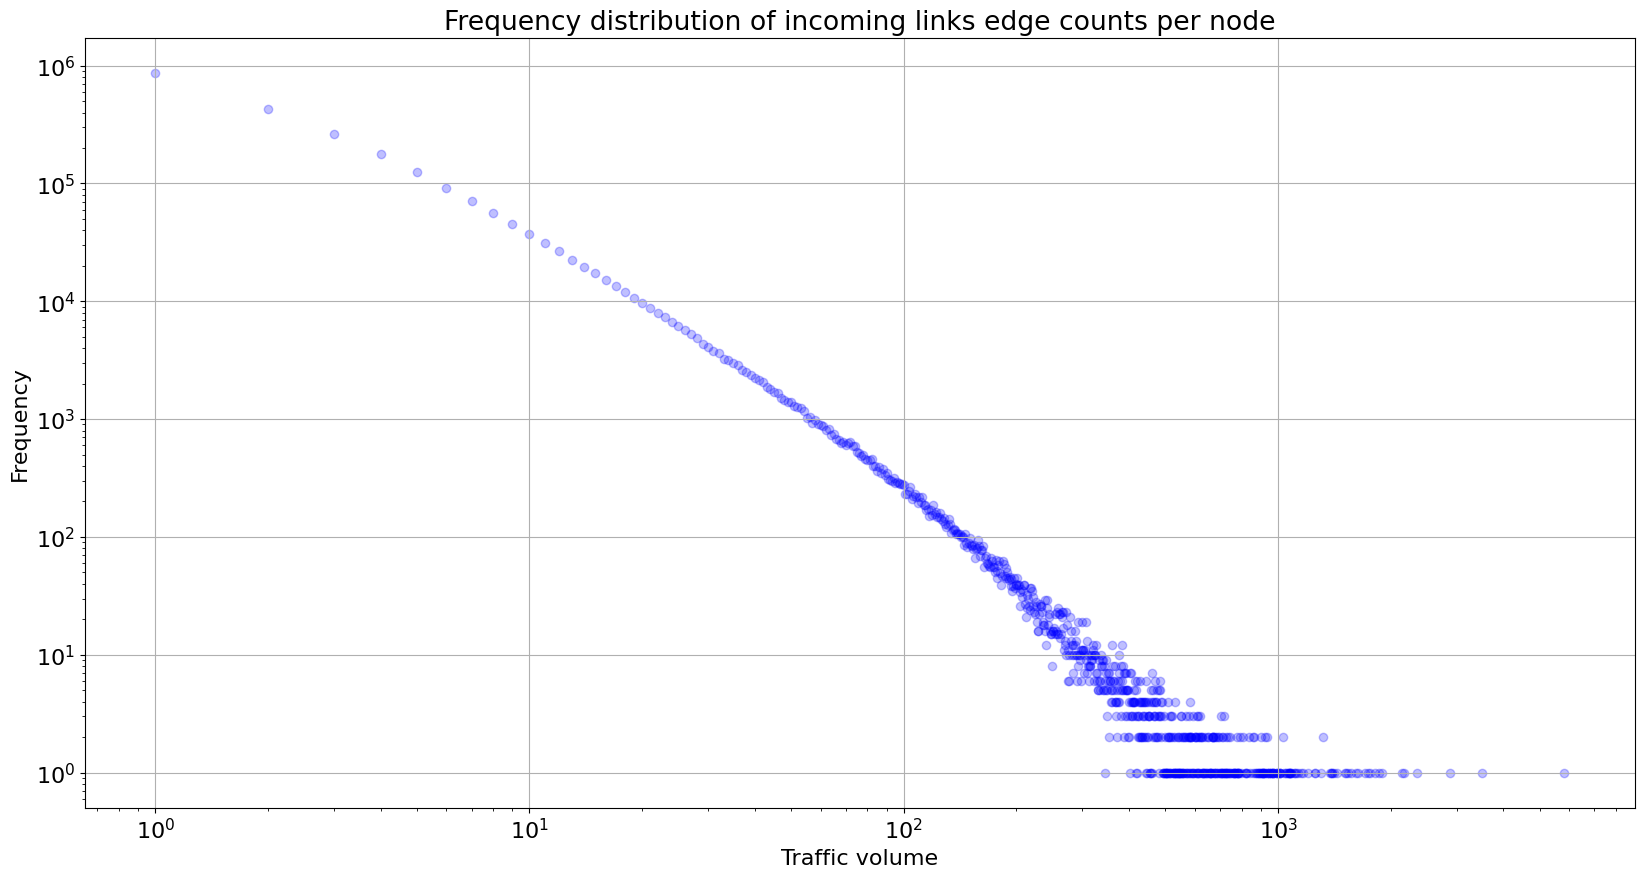

In [71]:
plot_freq_on_log_log_scale(link_end_nodes_edge_counts_freq, 
                           "Frequency distribution of incoming links edge counts per node")

###### Authorities by incoming average traffic per edge

In [72]:
link_end_nodes.sort_values("traffic_avg", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
curr,,,,,
Tasya_van_Ree,1,202678,0.0000,0.0001,202678.0000
List_of_Emily_Blunt_performances,1,119814,0.0000,0.0001,119814.0000
Keanu_Reeves_filmography,1,76607,0.0000,0.0000,76607.0000
List_of_Hugh_Jackman_performances,1,76477,0.0000,0.0000,76477.0000
Akshay_Kumar_filmography,1,76431,0.0000,0.0000,76431.0000
Marwencol_(film),4,299096,0.0000,0.0002,74774.0000
Vijay_Sethupathi_filmography,1,70201,0.0000,0.0000,70201.0000
You_(season_1),1,66623,0.0000,0.0000,66623.0000
Ryan_Reynolds_filmography,1,66521,0.0000,0.0000,66521.0000


Most of the top authority articles by average traffic volume have a single incoming edge with high traffic, and are about actor filmographies.

In [73]:
link_end_nodes_traffic_avg_freq = np.floor(link_end_nodes.traffic_avg).value_counts()

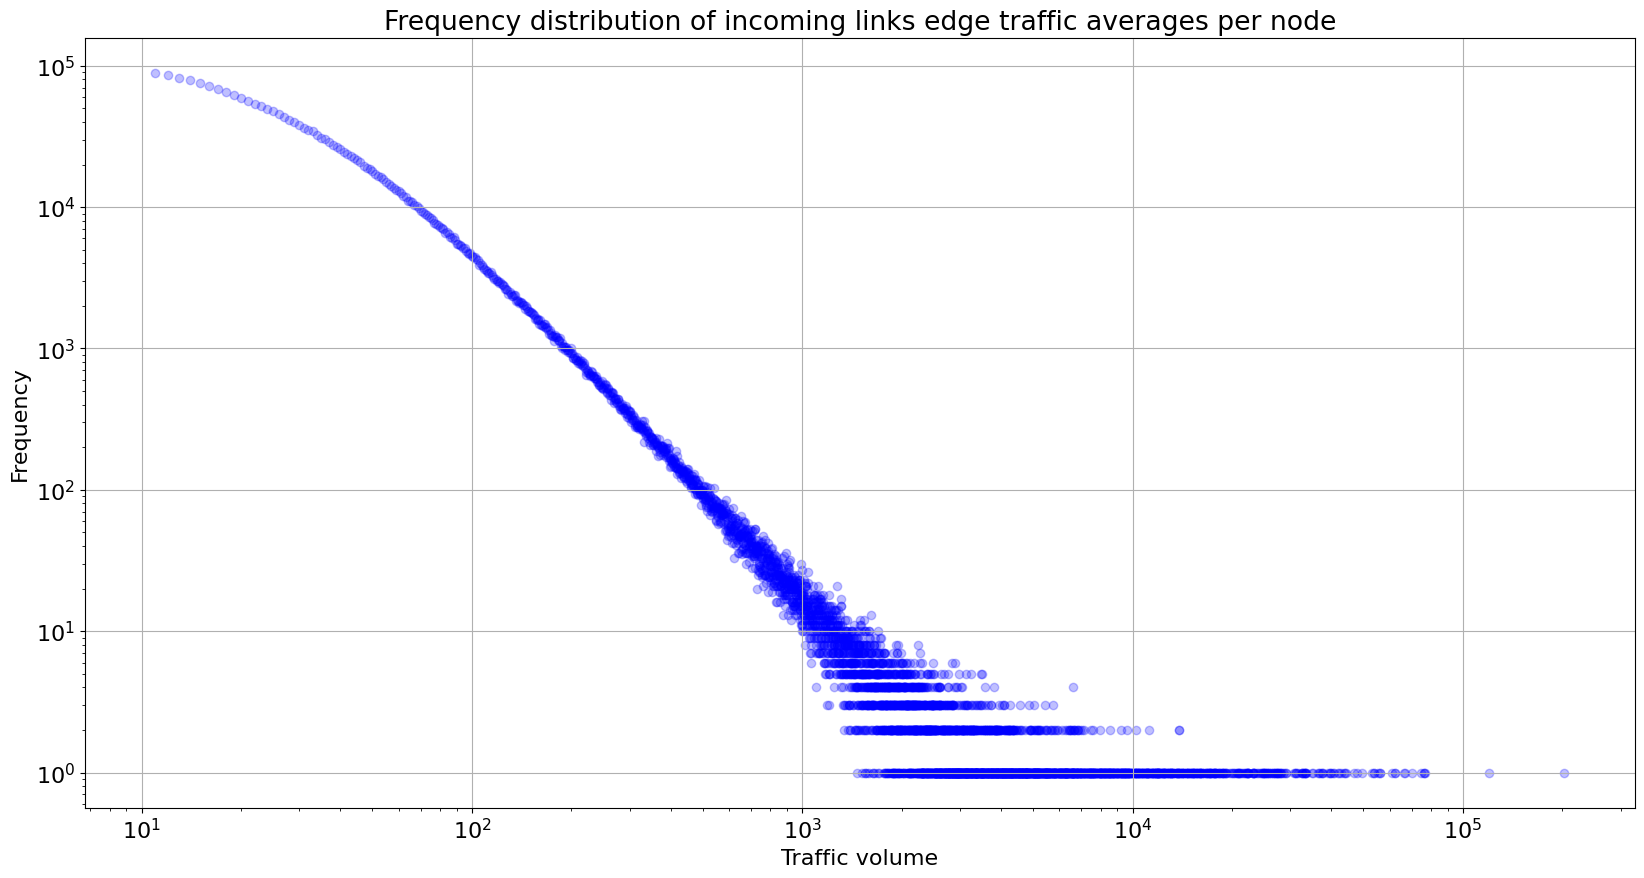

In [74]:
plot_freq_on_log_log_scale(link_end_nodes_traffic_avg_freq, 
                           "Frequency distribution of incoming links edge traffic averages per node")

#### 3.5 Internal search from Wikipedia pages  

This is the 'other' reference type. The definition of this reference type is a clickstream event from one English Wikipedia article to another when there is no link from one to the other. This kind of clickstream event can result from searching from a Wikipedia article page, but not necessarily. **For simplicity, we'll assume that the 'other' reference type represents internal search from Wikipedia article pages.**

In [75]:
other_edges.describe(include='all')

,prev,curr,type,n,month
npartitions=1,,,,,
,object,object,object,float64,object
,...,...,...,...,...


In [76]:
257794/1005180

0.2564655086651147

About 1 million clickstream edges have 'other' reference type, representing the internal searches between Wikipedia article pages. About 25.6% of these internal search edges start at the "Main Page".

In [77]:
other_edges.head(20)

,prev,curr,type,n,month
21,Neville_Wadia,Jehangir_Wadia,other,26,12
72,Main_Page,5.11_Tactical,other,27,12
96,Bone_age,Delayed_puberty,other,20,12
102,Constitutional_growth_delay,Delayed_puberty,other,18,12
112,Main_Page,Delayed_puberty,other,12,12
144,Main_Page,Whitby_railway_station,other,22,12
291,Main_Page,"I_Vow_to_Thee,_My_Country",other,97,12
337,My_Big_Fat_Greek_Wedding_2,My_Big_Fat_Greek_Life,other,29,12
353,Chin,Hominid_dental_morphology_evolution,other,13,12
369,Lionel_Tate,Nathaniel_Brazill,other,81,12


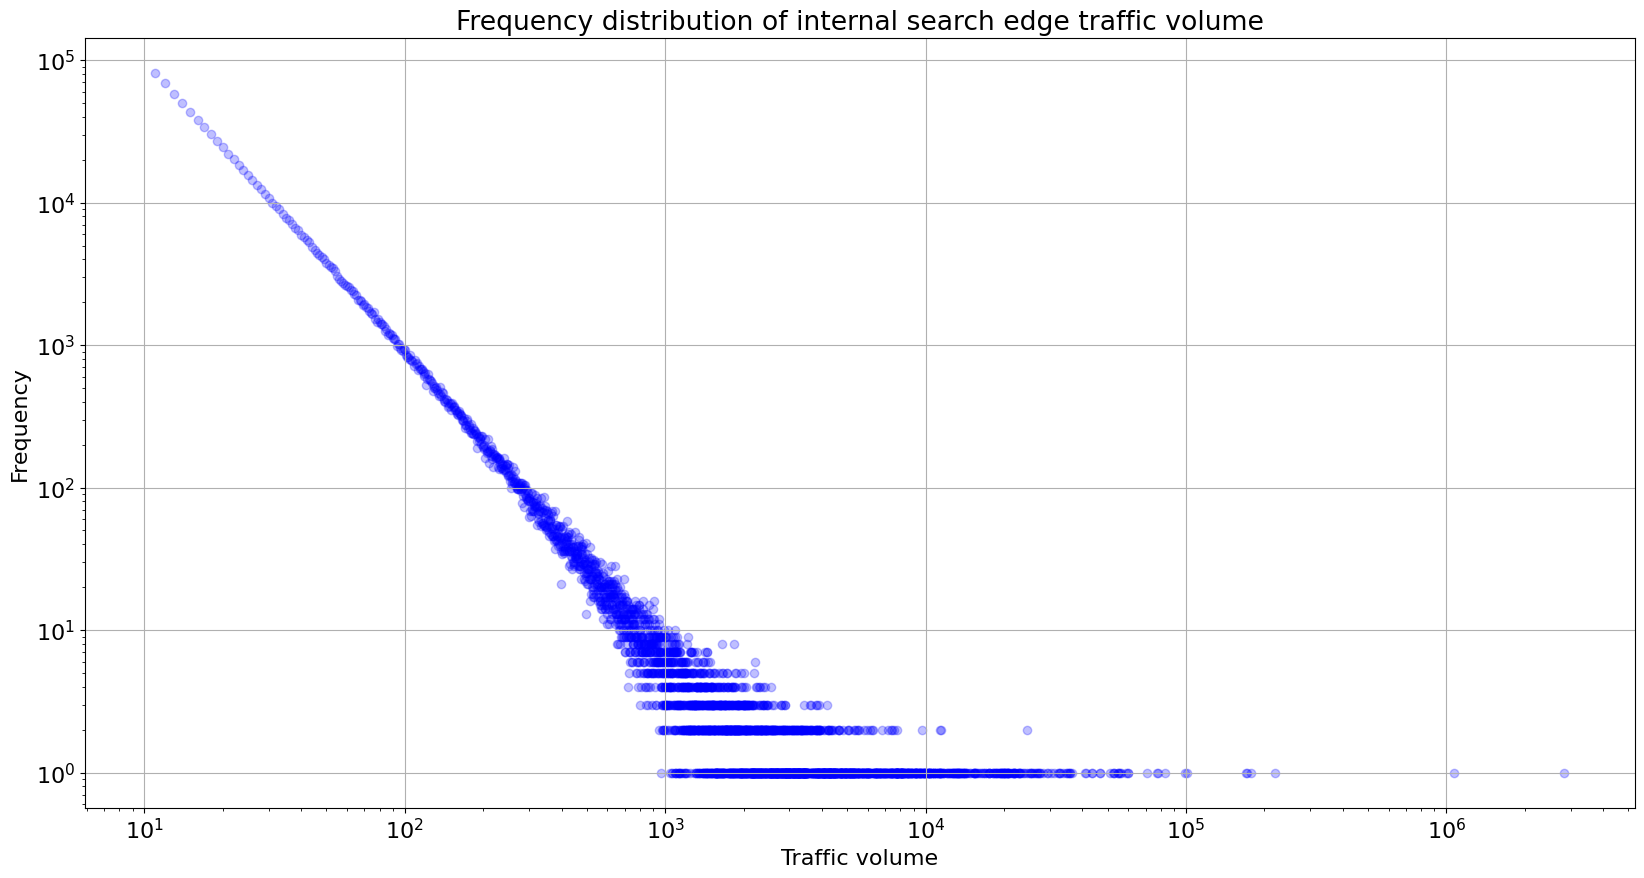

In [78]:
plot_freq_on_log_log_scale(other_edges_traffic_frequencies, 
                           "Frequency distribution of internal search edge traffic volume")

##### Internal search hubs

In [79]:
other_start_nodes = aggregate_edges_by(other_edges, "prev")
other_start_nodes = other_start_nodes.compute()
other_start_nodes.sort_values("traffic_volume", ascending=False, inplace=True)
other_start_nodes.describe()

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
count,275011.0000,275011.0000,275011.0000,275011.0000,275011.0000
mean,3.2879,214.5731,0.0000,0.0000,28.1723
std,457.4174,61585.4139,0.0005,0.0010,103.2196
min,1.0000,11.0000,0.0000,0.0000,11.0000
25%,1.0000,15.0000,0.0000,0.0000,14.0000
50%,1.0000,30.0000,0.0000,0.0000,19.0000
75%,3.0000,71.0000,0.0000,0.0000,29.5000
max,239840.0000,32294879.0000,0.2652,0.5473,40893.0000


###### Hubs by outgoing traffic volume

In [80]:
other_start_nodes.head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
prev,,,,,
Main_Page,239840,32294879,0.2652,0.5473,134.6518
Wiki,3243,133010,0.0036,0.0023,41.0145
Welcome_to_Marwen,103,72583,0.0001,0.0012,704.6893
George_H._W._Bush,317,69944,0.0004,0.0012,220.6435
Ralph_Breaks_the_Internet,198,67096,0.0002,0.0011,338.8687
Wikipedia,1712,56857,0.0019,0.0010,33.2109
Jason_Momoa,168,49894,0.0002,0.0008,296.9881
Aquaman_(film),527,46214,0.0006,0.0008,87.6926
2.0_(film),231,45986,0.0003,0.0008,199.0736


About 54% of all internal search traffic is coming from the "Main Page" article. The rest of the outgoing internal search traffic is spread out through other articles, all having less than 1% of outgoing internal search traffic.

In [81]:
other_start_nodes_traffic_freq = other_start_nodes.traffic_volume.value_counts()

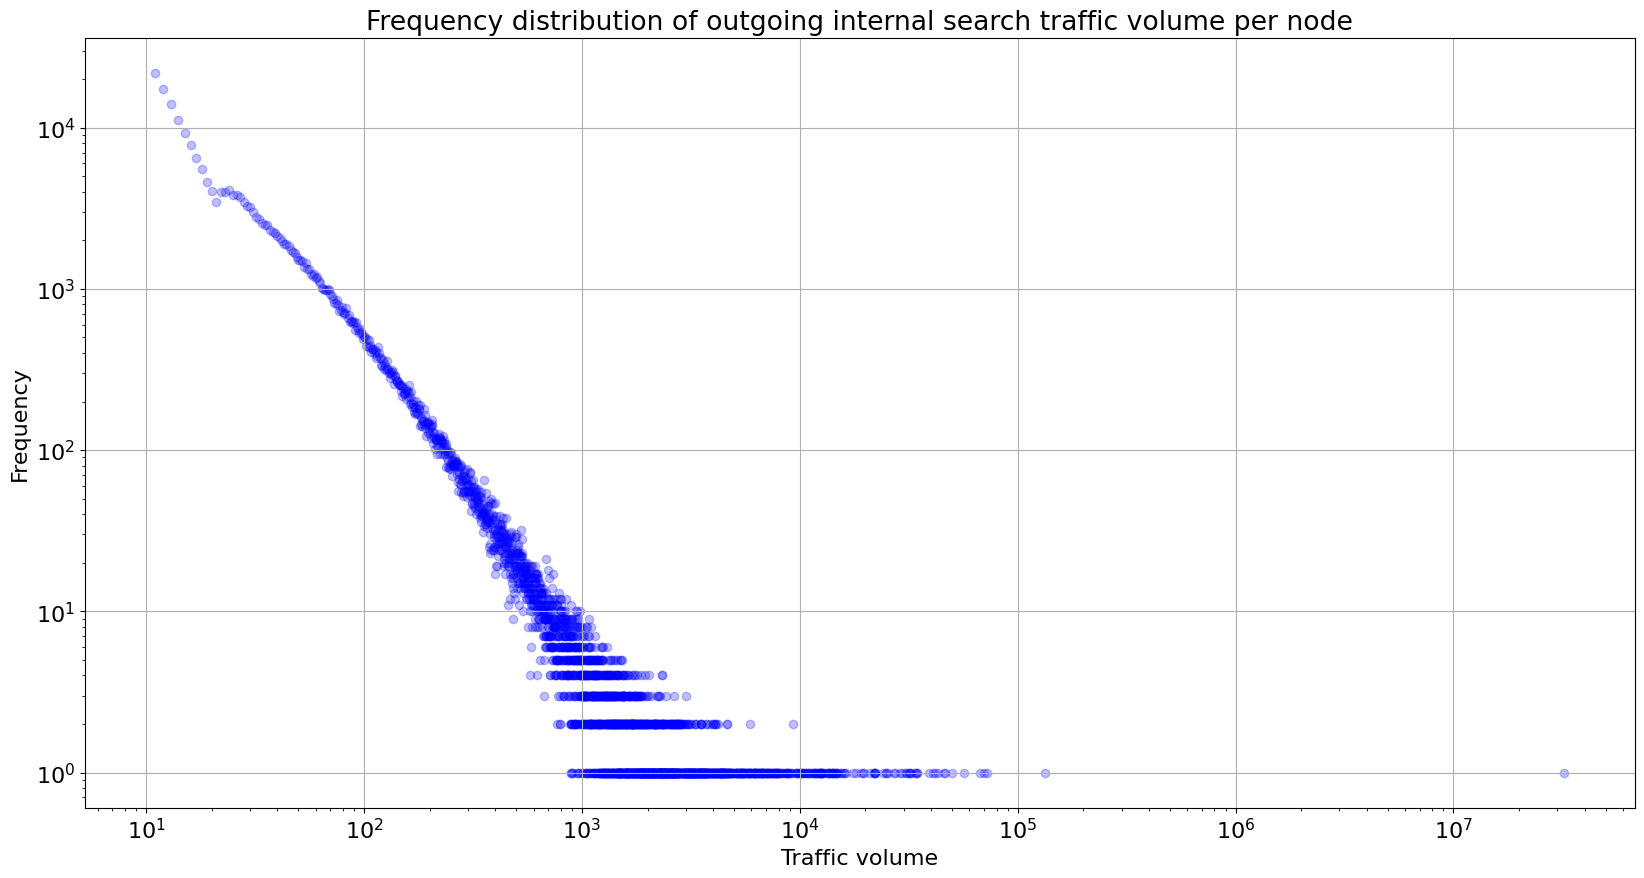

In [82]:
plot_freq_on_log_log_scale(other_start_nodes_traffic_freq, 
                           "Frequency distribution of outgoing internal search traffic volume per node")

###### Hubs by outgoing edge count

In [83]:
other_start_nodes.sort_values("edges_count", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
prev,,,,,
Main_Page,239840,32294879,0.2652,0.5473,134.6518
Wiki,3243,133010,0.0036,0.0023,41.0145
Wikipedia,1712,56857,0.0019,0.0010,33.2109
Aquaman_(film),527,46214,0.0006,0.0008,87.6926
English_Wikipedia,456,19483,0.0005,0.0003,42.7259
Spider-Man:_Into_the_Spider-Verse,374,30691,0.0004,0.0005,82.0615
Bird_Box_(film),356,28697,0.0004,0.0005,80.6096
2018_in_film,339,12519,0.0004,0.0002,36.9292
George_H._W._Bush,317,69944,0.0004,0.0012,220.6435


In [84]:
other_start_nodes_edge_counts_freq = other_start_nodes.edges_count.value_counts()

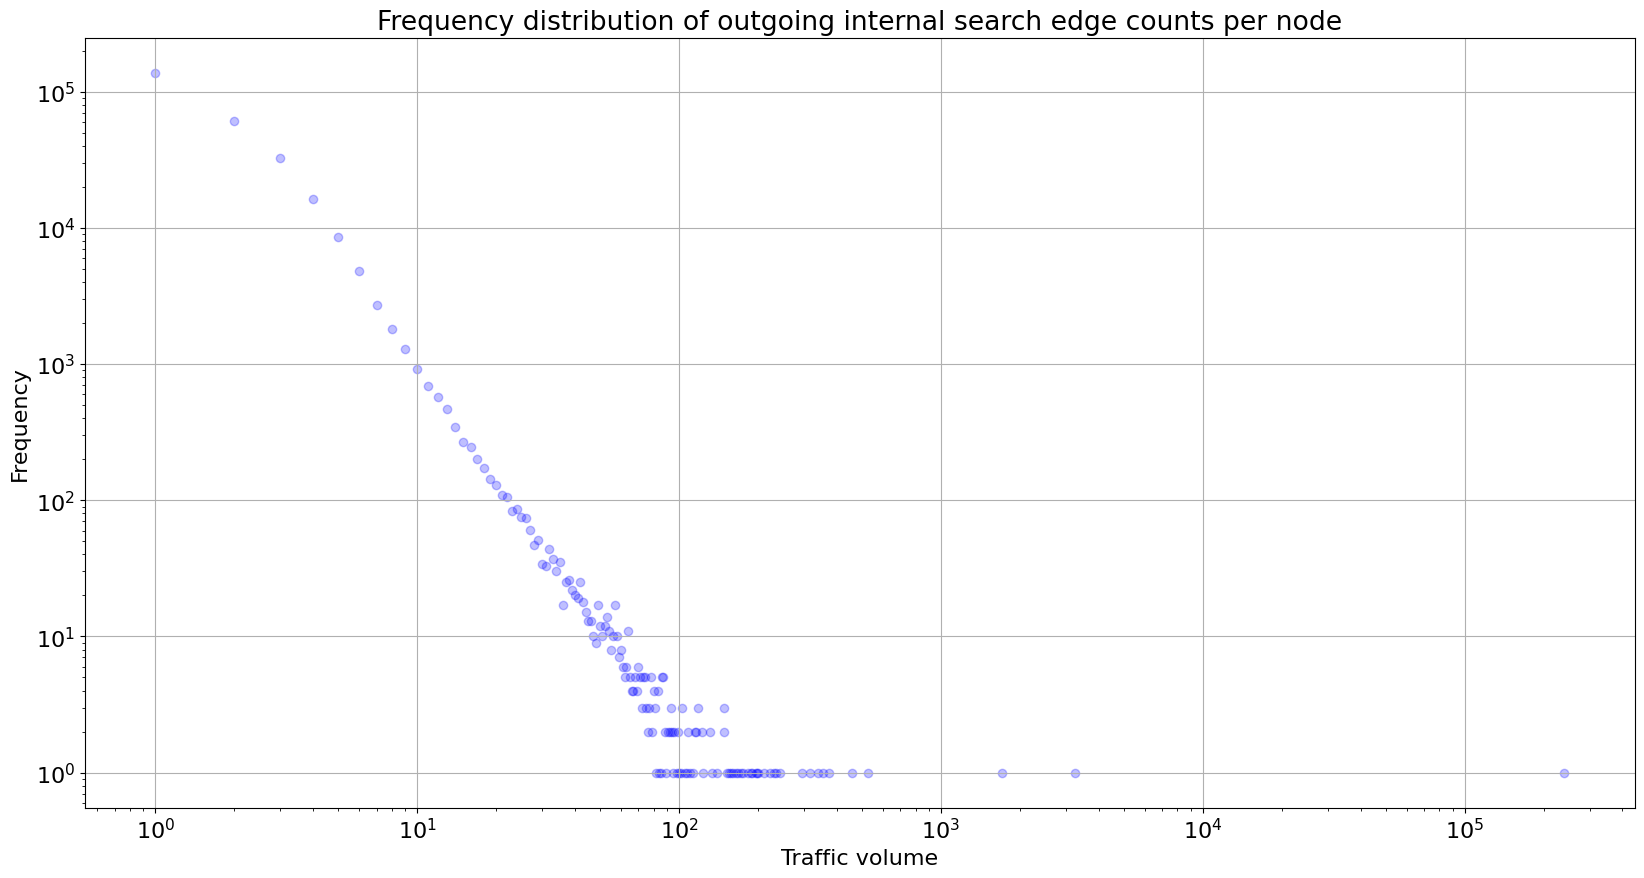

In [85]:
plot_freq_on_log_log_scale(other_start_nodes_edge_counts_freq, 
                           "Frequency distribution of outgoing internal search edge counts per node")

###### Hubs by outgoing average traffic per edge

In [86]:
other_start_nodes.sort_values("traffic_avg", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
prev,,,,,
AppNeta,1,40893,0.0000,0.0007,40893.0000
Jock_McKeen,1,27418,0.0000,0.0005,27418.0000
Check_verification_service,2,22147,0.0000,0.0004,11073.5000
Balaji_Tharaneetharan,2,6532,0.0000,0.0001,3266.0000
Caitlin_Stasey,1,3115,0.0000,0.0001,3115.0000
Liliana_Mumy,3,8342,0.0000,0.0001,2780.6667
Keisha_Grey,4,9566,0.0000,0.0002,2391.5000
Grimes_(musician),10,21920,0.0000,0.0004,2192.0000
Blue_Film_Woman,7,14363,0.0000,0.0002,2051.8571


In [87]:
other_edges[other_edges.prev == "AppNeta"]

,prev,curr,type,n,month
npartitions=13,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [88]:
other_edges[other_edges.prev == "Check_verification_service"]

,prev,curr,type,n,month
npartitions=13,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [89]:
other_edges[other_edges.prev == "YouTube_Rewind"]

,prev,curr,type,n,month
npartitions=13,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [90]:
other_start_nodes_traffic_avg_freq = np.floor(other_start_nodes.traffic_avg).value_counts()

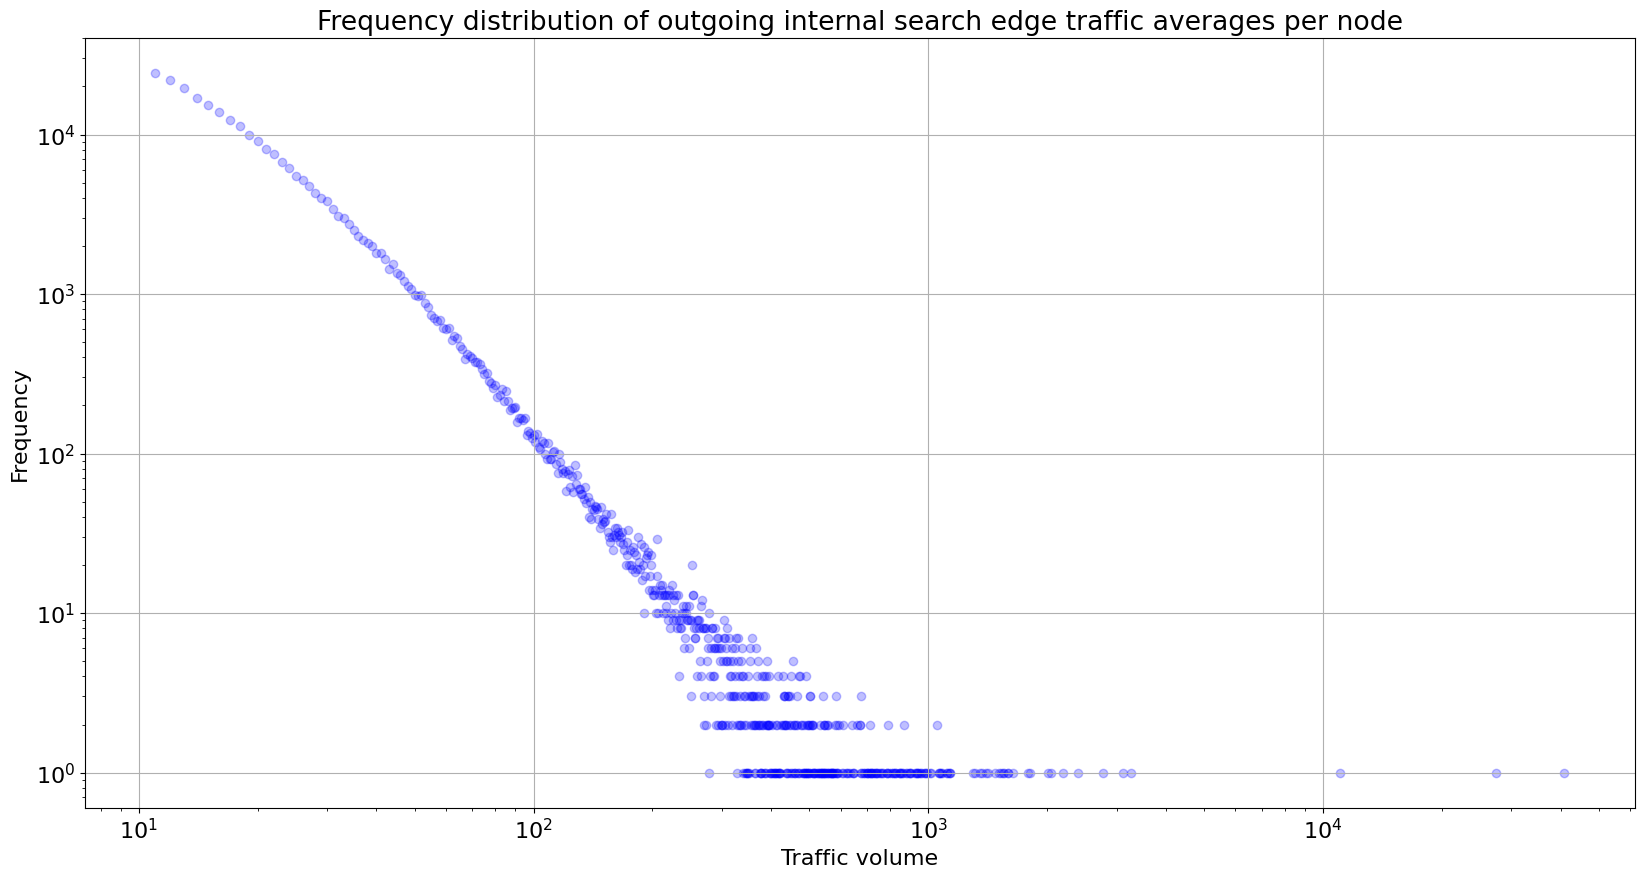

In [91]:
plot_freq_on_log_log_scale(other_start_nodes_traffic_avg_freq, 
                           "Frequency distribution of outgoing internal search edge traffic averages per node")

##### Internal search authorities

In [92]:
other_end_nodes = aggregate_edges_by(other_edges, "curr")
other_end_nodes = other_end_nodes.compute()
other_end_nodes.sort_values("traffic_volume", ascending=False, inplace=True)
other_end_nodes.describe()

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
count,384317.0000,384317.0000,384317.0000,384317.0000,384317.0000
mean,2.3528,153.5450,0.0000,0.0000,56.4308
std,245.6430,13699.2099,0.0003,0.0002,504.0402
min,1.0000,11.0000,0.0000,0.0000,11.0000
25%,1.0000,16.0000,0.0000,0.0000,15.0000
50%,1.0000,29.0000,0.0000,0.0000,23.0000
75%,2.0000,69.0000,0.0000,0.0000,43.5000
max,115595.0000,7439088.0000,0.1278,0.1261,85917.5000


###### Authorities by incoming traffic volume

In [93]:
other_end_nodes.head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
curr,,,,,
Hyphen-minus,115595,7439088,0.1278,0.1261,64.3548
Main_Page,99114,3904810,0.1096,0.0662,39.3972
Lists_of_deaths_by_year,254,1074467,0.0003,0.0182,4230.1850
George_H._W._Bush,185,225867,0.0002,0.0038,1220.9027
Yellow_vests_movement,23,178822,0.0000,0.0030,7774.8696
Balangiga_bells,2,171835,0.0000,0.0029,85917.5000
Pineapple,22,170588,0.0000,0.0029,7754.0000
2018_Sunda_Strait_tsunami,4,100893,0.0000,0.0017,25223.2500
2018_Strasbourg_attack,6,99298,0.0000,0.0017,16549.6667


About 12.6% of internal search traffic are to the "Hyphen-minus" article, followed by 7% to the "Main Page" article, with the rest of search traffic going to other articles with under 1% of the traffic volume.

In [94]:
other_end_nodes_traffic_freq = other_end_nodes.traffic_volume.value_counts()

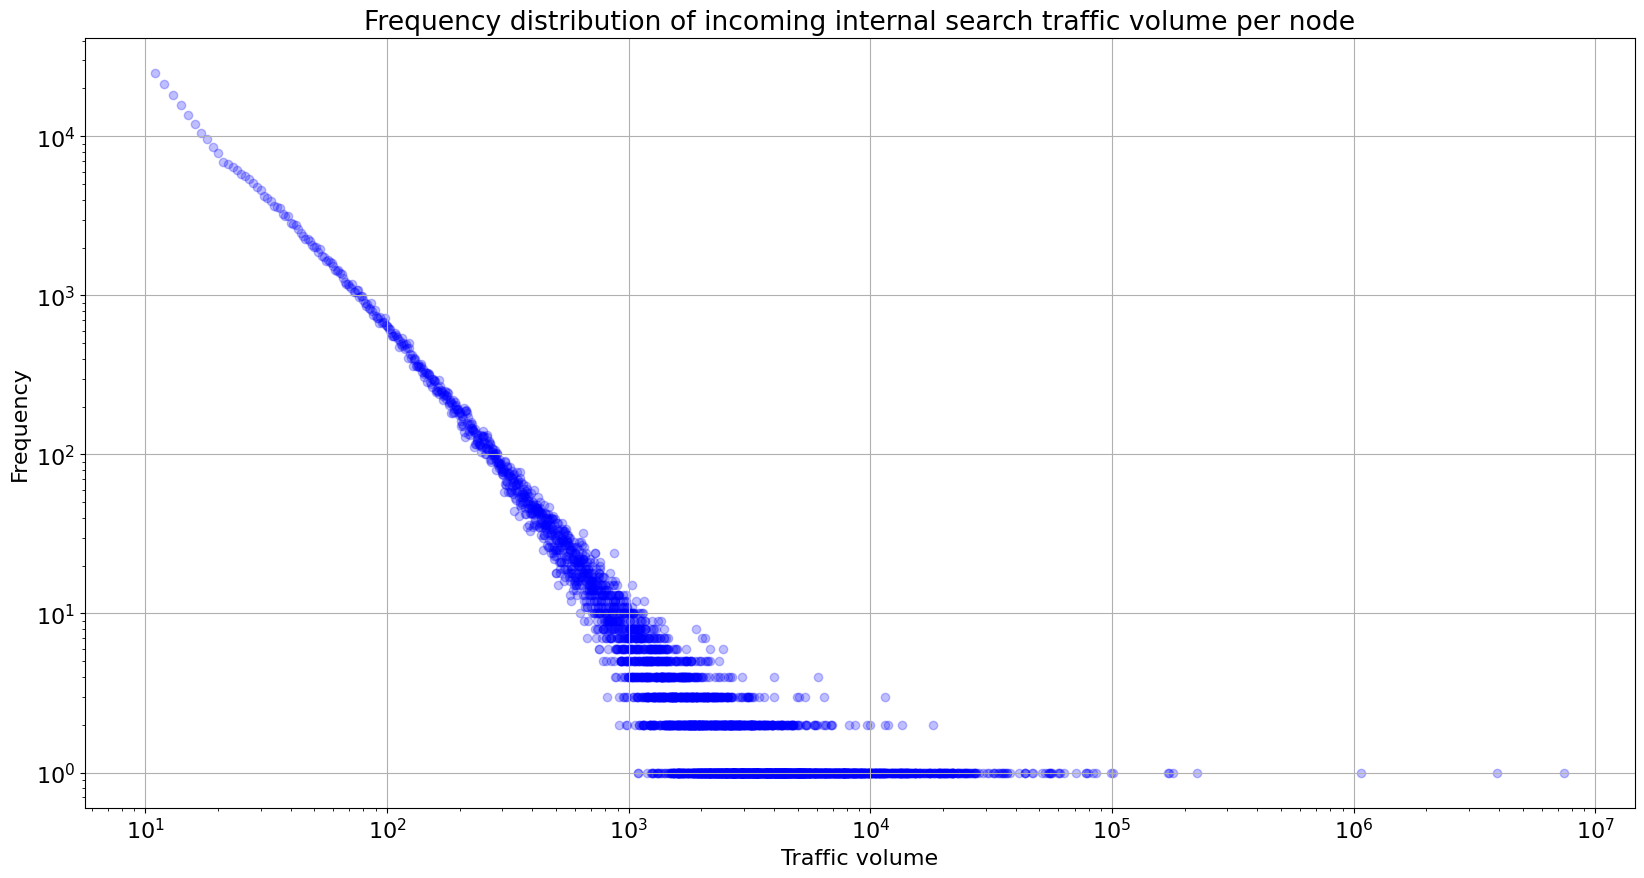

In [95]:
plot_freq_on_log_log_scale(other_end_nodes_traffic_freq, 
                           "Frequency distribution of incoming internal search traffic volume per node")

###### Authorities by incoming edge count

In [96]:
other_end_nodes.sort_values("edges_count", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
curr,,,,,
Hyphen-minus,115595,7439088,0.1278,0.1261,64.3548
Main_Page,99114,3904810,0.1096,0.0662,39.3972
Aquaman_(film),602,86204,0.0007,0.0015,143.1960
Spider-Man:_Into_the_Spider-Verse,450,60987,0.0005,0.0010,135.5267
2018_in_film,366,37883,0.0004,0.0006,103.5055
Bird_Box_(film),286,43834,0.0003,0.0007,153.2657
Lists_of_deaths_by_year,254,1074467,0.0003,0.0182,4230.1850
Null,253,7463,0.0003,0.0001,29.4980
Bumblebee_(film),244,34184,0.0003,0.0006,140.0984


In [97]:
other_end_nodes_edge_counts_freq = other_end_nodes.edges_count.value_counts()

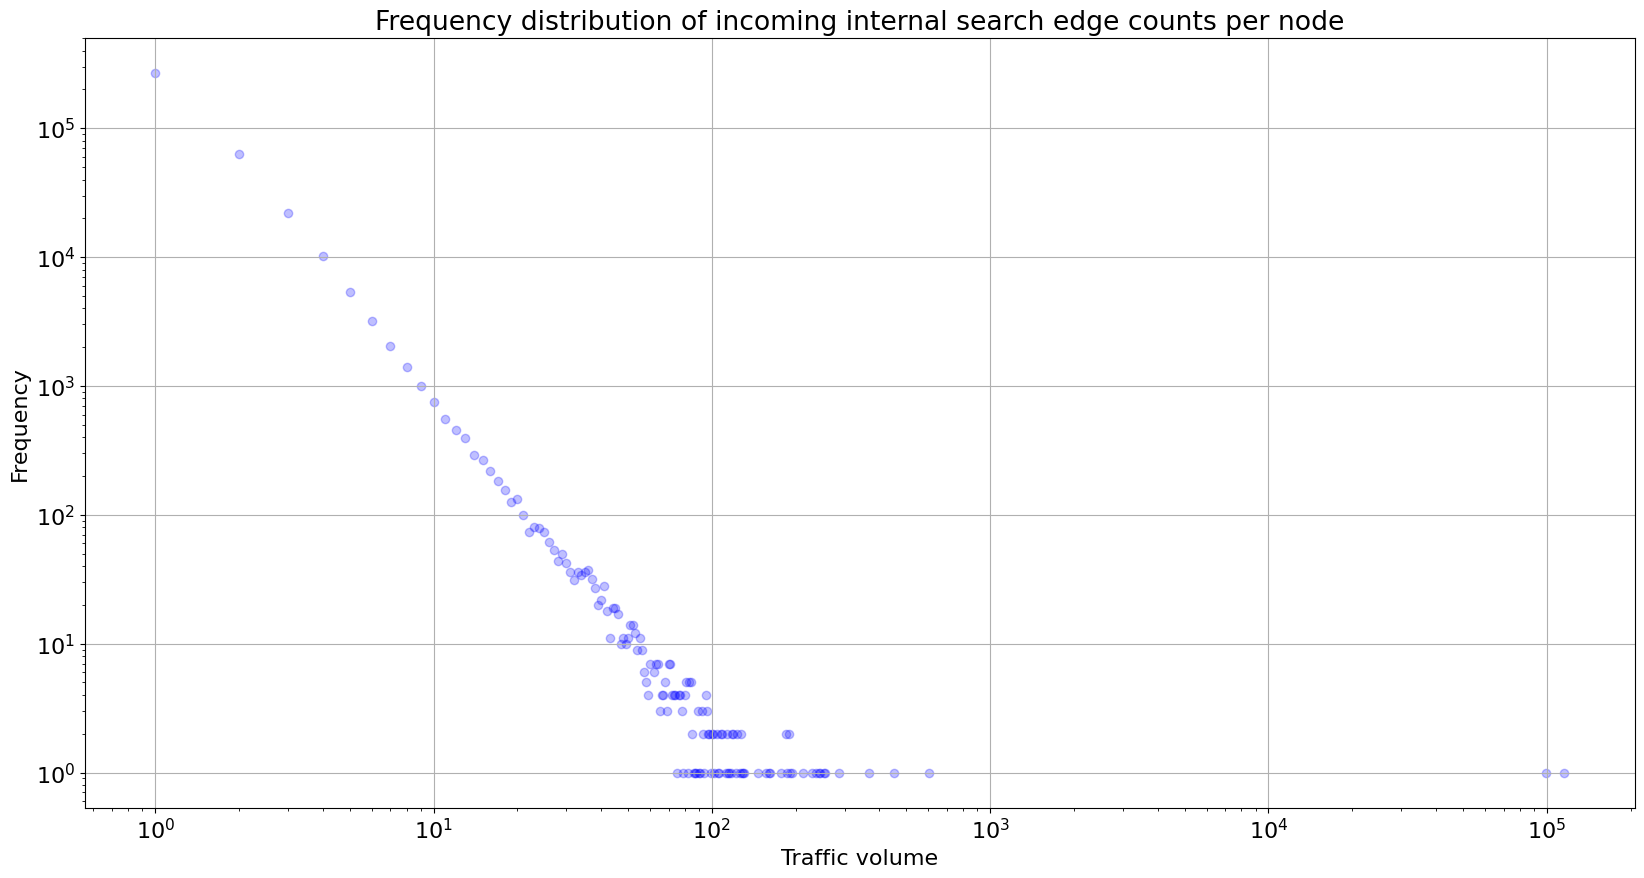

In [98]:
plot_freq_on_log_log_scale(other_end_nodes_edge_counts_freq, 
                           "Frequency distribution of incoming internal search edge counts per node")

###### Hubs by outgoing average traffic per edge

In [99]:
other_end_nodes.sort_values("traffic_avg", ascending=False).head(20)

,edges_count,traffic_volume,edges_count_pct,traffic_volume_pct,traffic_avg
curr,,,,,
Balangiga_bells,2,171835,0.0000,0.0029,85917.5000
OSIRIS-REx,1,78426,0.0000,0.0013,78426.0000
Allied_naval_bombardments_of_Japan_during_World_War_II,1,77714,0.0000,0.0013,77714.0000
Marşandiz_train_collision,1,70717,0.0000,0.0012,70717.0000
Laurence_Olivier,1,60131,0.0000,0.0010,60131.0000
SY_Aurora's_drift,1,56364,0.0000,0.0010,56364.0000
Jean_Baptiste_Point_du_Sable,1,55664,0.0000,0.0009,55664.0000
Japanese_battleship_Nagato,1,55184,0.0000,0.0009,55184.0000
Enrico_Fermi,1,54749,0.0000,0.0009,54749.0000


In [100]:
other_end_nodes_traffic_avg_freq = np.floor(other_end_nodes.traffic_avg).value_counts()

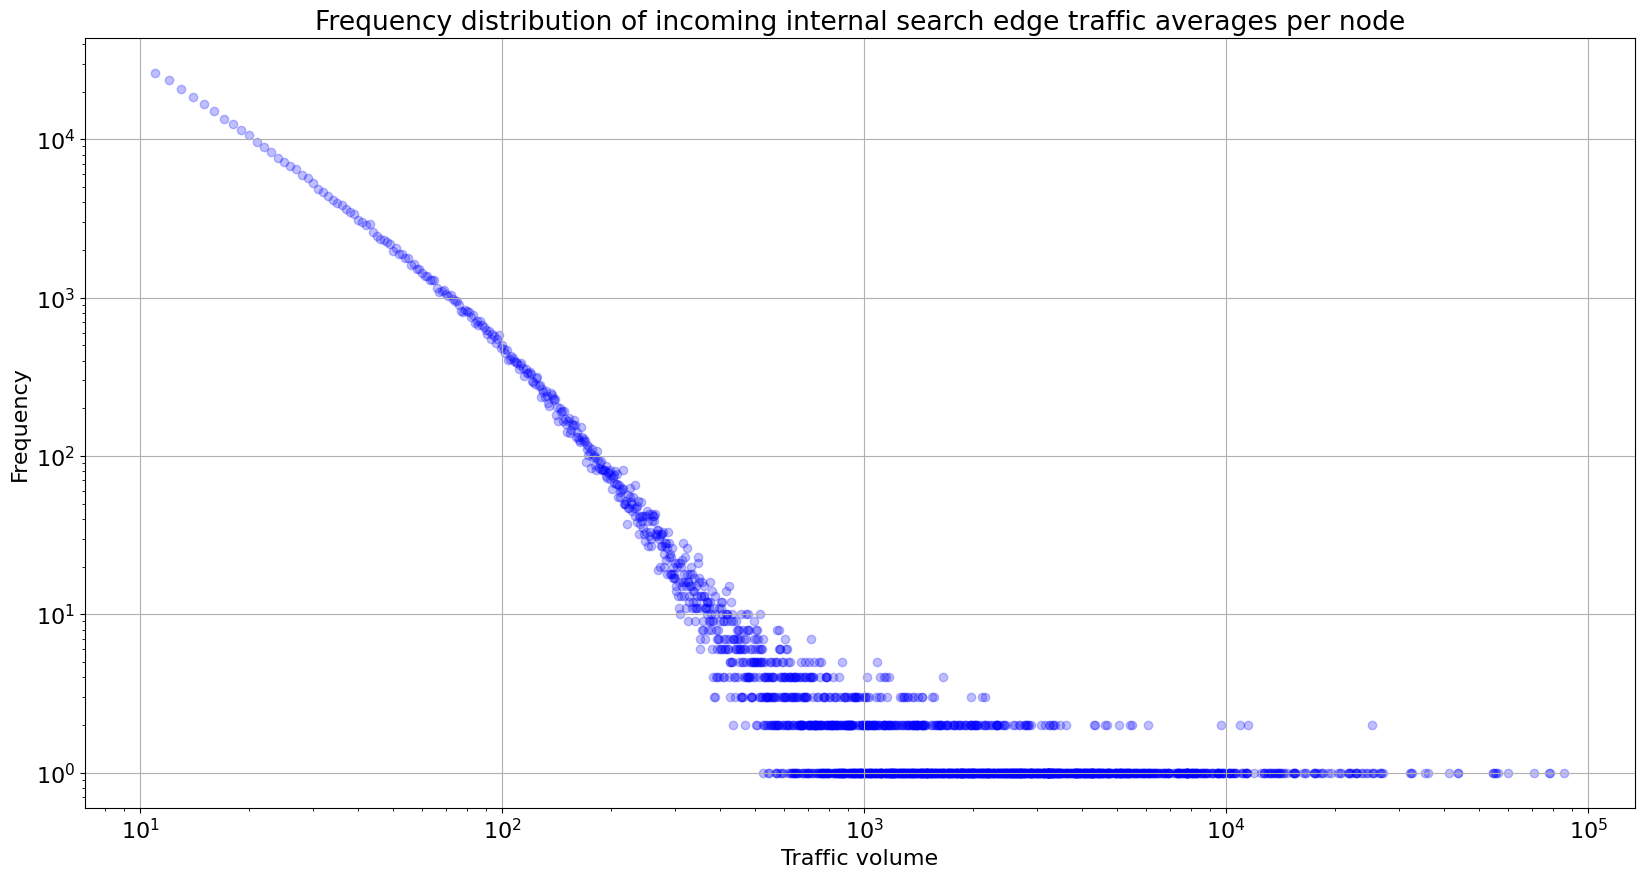

In [101]:
plot_freq_on_log_log_scale(other_end_nodes_traffic_avg_freq, 
                           "Frequency distribution of incoming internal search edge traffic averages per node")

#### 3.6 Checking edges to/from articles that might suggest bot or abnormal traffic  

These connections might not represent human user browsing/searching behavior, and might cause overlinking in the graph model.

In [102]:
df[(df.prev == "Hyphen-minus") & (df.type == "other")]

,prev,curr,type,n,month
npartitions=13,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [103]:
test = df[(df.curr == "Hyphen-minus") & (df.type == "other")]

In [104]:
len(test)

115595

In [105]:
test2 = df[(df.prev == "Hyphen-minus") & (df.type == "link")]

In [106]:
len(test2)

17

In [107]:
test3 = df[(df.curr == "Hyphen-minus") & (df.type == "link")]

In [108]:
len(test3)

109

In [109]:
df[(df.prev == "Undefined") & (df.type == "other")]

,prev,curr,type,n,month
npartitions=13,,,,,
,string,string,category[unknown],int32,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [110]:
test = df[(df.curr == "Undefined") & (df.type == "other")]

In [111]:
len(test)

212

In [112]:
test2 = df[(df.curr == "Undefined") & (df.type == "link")]
len(test2)

0

In [113]:
test3 = df[(df.prev == "Undefined") & (df.type == "link")]
len(test3)

1

#### 3.7 Correlation Matrix (Heatmap): Identifying Co-Moving Topics

In addition to analyzing how users navigate between Wikipedia articles, we also study how article popularity changes over time. For this purpose, we build monthly traffic time series for each article and compute **Pearson correlations** between them.

Articles with high correlation values tend to gain and lose attention at the same time, which often indicates shared external influences such as major events, trends, or news topics.

To visualize these relationships, we display the correlation matrix as a **heatmap**, where each cell shows how strongly two articles co-move in popularity over time. This provides a complementary perspective to the clickstream network, focusing on **temporal similarity rather than direct navigation paths**.

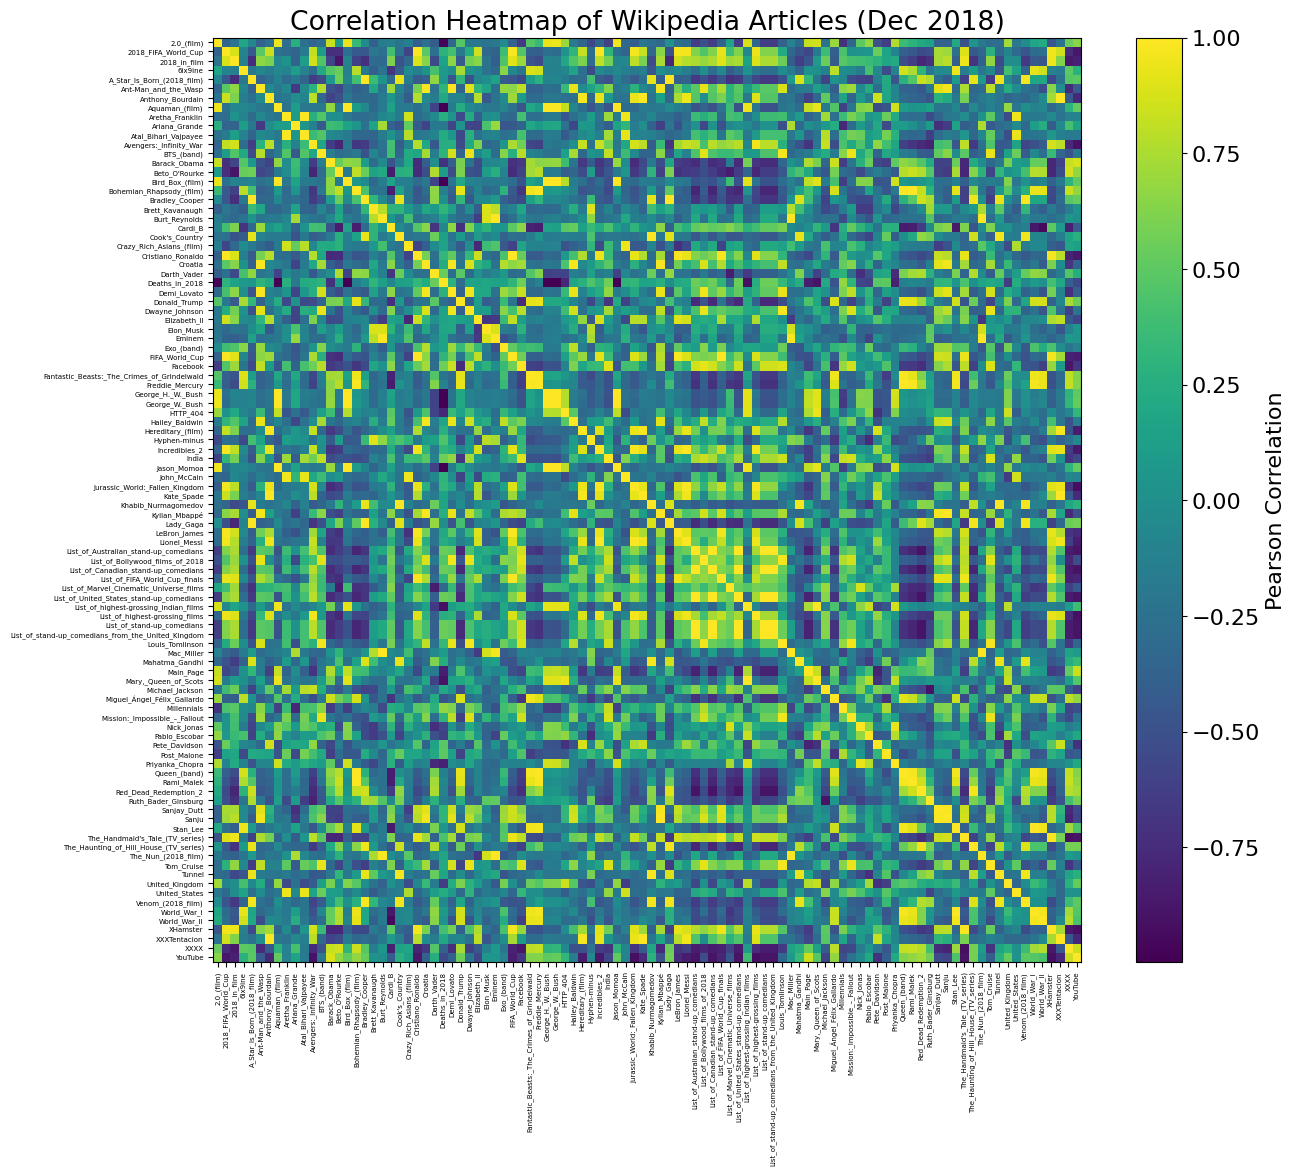

In [114]:
import dask.dataframe as dd

# Concatenate all monthly clickstream datasets into one Dask DataFrame
monthly_df = dd.concat(all_dfs)

# Compute total traffic per article first (Dask lazy)
article_totals = monthly_df.groupby("curr")["n"].sum()

# Get top 100 articles (compute only small series)
top_articles = article_totals.nlargest(100).compute().index.tolist()

# Filter monthly_df for only top articles (Dask lazy, now much smaller)
monthly_top = monthly_df[monthly_df["curr"].isin(top_articles)]

# Aggregate traffic per article per month (small Dask table now)
traffic_by_article_month_top = (
    monthly_top.groupby(["curr", "month"])["n"]
    .sum()
    .reset_index()
)

# Convert to Pandas (small table, safe)
traffic_top_pd = traffic_by_article_month_top.compute()

# Pivot for heatmap
pivot_table_top = traffic_top_pd.pivot_table(
    index="curr",
    columns="month",
    values="n",
    fill_value=0
)

# Compute the Pearson correlation between article traffic time series
corr_matrix = pivot_table_top.T.corr(method="pearson")

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14,12))

# Display the matrix values as colors
plt.imshow(corr_matrix, aspect='auto')

# Add a color bar to show correlation strength
plt.colorbar(label="Pearson Correlation")

# Label the axes with article names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=5)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index, fontsize=5)

# Add title
plt.title("Correlation Heatmap of Wikipedia Articles (Dec 2018)")
plt.show()


General Observations from the Heatmap

Strong yellow blocks
- Around movie/franchise articles (e.g., *Mission: Impossible - Fallout*, *Incredibles 2*, *Jurassic World: Fallen Kingdom*, *Venom (2018)*).  
- Indicates correlated traffic—users search these articles around the same months, likely due to simultaneous releases or marketing campaigns.

Sports/Celebrity block
- Articles like *Cristiano Ronaldo*, *FIFA World Cup*, *Lionel Messi*, *Kylian Mbappé* cluster together.  
- Shows global sports events drive co-searched articles.

Music/entertainment block
- *Eminem*, *Ariana Grande*, *BTS* form a smaller cluster—attention to popular artists moves together.

Political figures
- *Donald Trump*, *Barack Obama*, *George W. Bush* correlate weakly with movies/music, but cluster with each other during newsworthy periods.

Example Interpretation

- **Movie block:** *Mission: Impossible - Fallout*, *Incredibles 2*, *Jurassic World*, *Venom*, *Avengers: Infinity War* show high correlation → traffic rises and falls together.  
- **Interpretation:** Users follow blockbuster releases simultaneously, highlighting temporal interest patterns rather than link structure.

Conclusion

- Heatmap reveals thematic clusters and co-evolving popularity:  
  - **Blockbusters →** correlated traffic  
  - **Sports/competitions →** correlated traffic  
  - **Music artists →** correlated traffic  
  - **Weakly correlated articles (green/purple) →** independent interests

### Event detection:

Most Event-Driven: Cook's_Country (Score: 2.64)
Most Stable: Main_Page (Score: 0.07)


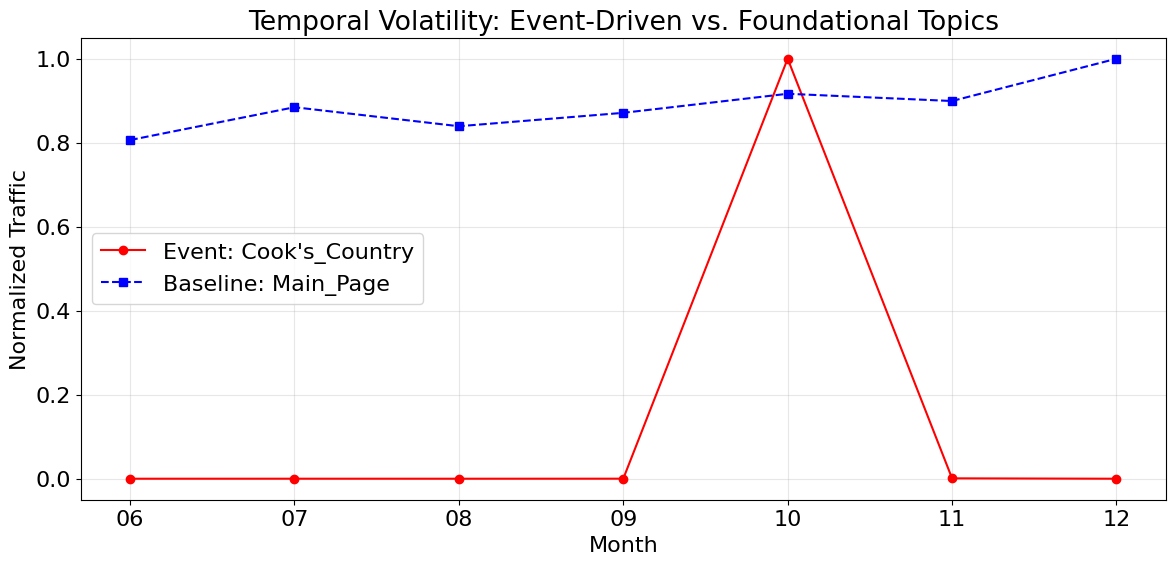

In [115]:
article_stats = pd.DataFrame()
article_stats['mean'] = pivot_table_top.mean(axis=1)
article_stats['std'] = pivot_table_top.std(axis=1)
article_stats['volatility_score'] = article_stats['std'] / article_stats['mean']

# Find max/min
most_volatile_article = article_stats['volatility_score'].idxmax()
most_stable_article = article_stats['volatility_score'].idxmin()

print(f"Most Event-Driven: {most_volatile_article} (Score: {article_stats.loc[most_volatile_article, 'volatility_score']:.2f})")
print(f"Most Stable: {most_stable_article} (Score: {article_stats.loc[most_stable_article, 'volatility_score']:.2f})")

plt.figure(figsize=(14, 6))

vol_series = pivot_table_top.loc[most_volatile_article]
stab_series = pivot_table_top.loc[most_stable_article]

# Normalize data to 0-1 scale for fair comparison
plt.plot(vol_series.index, vol_series.values / vol_series.max(),
         marker='o', color='red', label=f"Event: {most_volatile_article}")
plt.plot(stab_series.index, stab_series.values / stab_series.max(),
         marker='s', linestyle='--', color='blue', label=f"Baseline: {most_stable_article}")

plt.title("Temporal Volatility: Event-Driven vs. Foundational Topics")
plt.xlabel("Month")
plt.ylabel("Normalized Traffic")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### 3.8 Sankey Diagram: Flow of Attention Across Namespaces and Media Franchises.

To better understand how users navigate between different thematic areas on Wikipedia, we use a Sankey diagram to visualize the aggregated clickstream transitions between article categories. Each flow represents the total traffic moving from one domain to another, while the width of the link reflects the relative volume of that movement.

This visualization highlights the dynamic and exploratory nature of user behavior, showing how readers often begin in one topic area and then transition to related domains. Rather than viewing Wikipedia as a collection of isolated pages, this approach emphasizes its role as an interconnected knowledge network that supports gradual learning and information discovery.

Note: this confirms the 'Rabbit Hole' effect within specific pop-culture clusters (e.g., Marvel, Star Wars), where users navigate deeply between related entities.

In [116]:
def get_domain(article):
    if article.startswith("User:") or article.startswith("Talk:"):
        return "Meta"
    if ":" in article:
        return article.split(":")[0]
    return "Article"

In [117]:
# Apply domain mapping on both source (prev) and destination (curr) columns
monthly_df["domain_from"] = monthly_df["prev"].map(get_domain, meta=("prev","object"))
monthly_df["domain_to"] = monthly_df["curr"].map(get_domain, meta=("curr","object"))

In [118]:
# Group by source domain and destination domain, summing traffic volume
domain_flows = (
    monthly_df.groupby(["domain_from", "domain_to"])["n"]
    .sum()
    .reset_index()
)

# Keep only the most significant flows to avoid overcrowding the Sankey diagram
domain_flows = domain_flows[domain_flows["n"] > 5000]
domain_flows = domain_flows.compute()

In [119]:
import plotly.graph_objects as go

# Use the top 75 flows for a more comprehensive view
top_flows = domain_flows.nlargest(75, 'n')

# Extract unique labels and create a mapping index
labels = list(set(top_flows["domain_from"]) | set(top_flows["domain_to"]))
label_index = {label: i for i, label in enumerate(labels)}

fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,          # Vertical spacing between nodes to prevent overlap
        thickness=20,    # Horizontal width of the node bars
        line=dict(color="black", width=0.5),
        label=labels,
        color="royalblue"
    ),
    link=dict(
        source=top_flows["domain_from"].map(label_index),
        target=top_flows["domain_to"].map(label_index),
        value=top_flows["n"], # Use raw values so flow thickness represents actual traffic
        color="rgba(173, 216, 230, 0.4)"
    )
))

# Layout adjustments for readability
fig.update_layout(
    title_text="Top 75 Wikipedia Domain Flows",
    font_size=10,
    height=1200,       # Increased height significantly to accommodate more nodes
    margin=dict(l=50, r=50, t=80, b=50) # Added margins for long domain labels
)

fig.show()

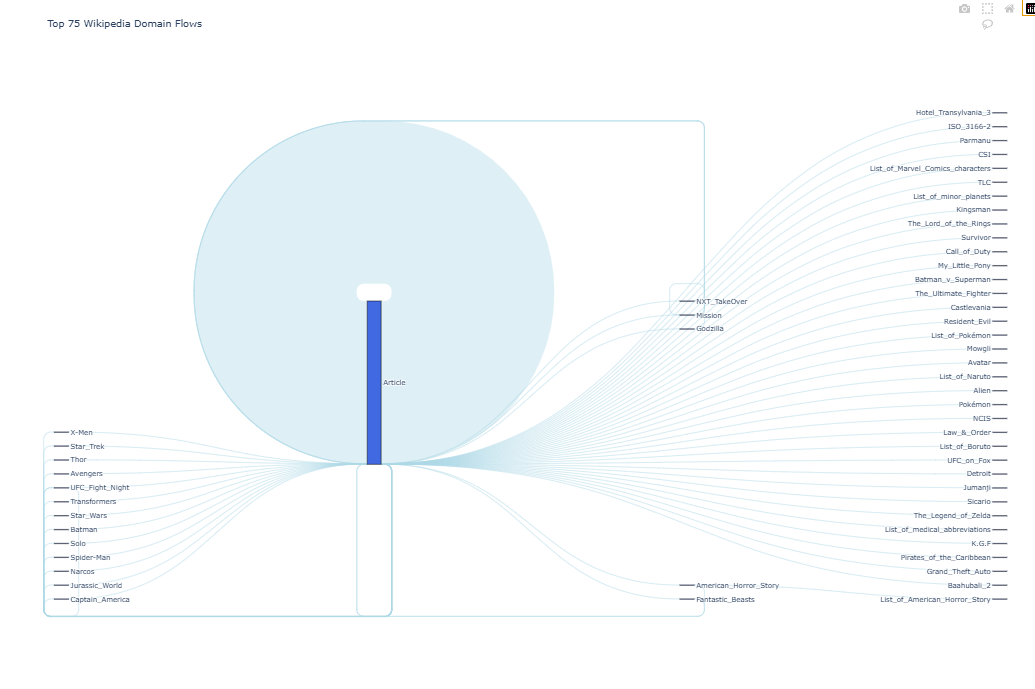

Interpretation and Key Conclusions

1. Dominance of Pop Culture and Media Ecosystems

    The most prominent takeaway from both visualizations is that Wikipedia navigation is heavily driven by entertainment franchises.

- **Cinematic Universes:** The Sankey diagram reveals massive flows between Marvel and action-related articles such as *Avengers*, *X-Men*, *Thor*, and *Captain America*. This suggests a “deep-dive” behavior, where users explore character backgrounds or sequels immediately after viewing a primary film page.
- **Gaming and Anime:** The presence of titles like *Grand Theft Auto*, *Pokémon*, and *Naruto* indicates that users utilize Wikipedia as a central “fan wiki” to navigate complex fictional lore.

2. “Hub and Spoke” Navigational Patterns

    The Sankey diagram illustrates a clear centralized node structure.

- A significant portion of traffic flows through large “hub” pages or list-style articles.
- These hubs act as central terminals where users arrive from specific topics to decide their next destination, facilitating movement across a wide variety of sub-topics.

#### 3.9 Network Graph: Revealing Structural Relationships Between Articles

This network graph visualizes the navigational ecosystem of Wikipedia by representing articles as nodes and the traffic between them as directed edges. By applying a force-directed layout, the visualization clusters highly interrelated topics, revealing the "communities" of content that users traverse most frequently. The node size and color intensity correspond to the Node Degree (the number of connections), highlighting central "hubs" that act as primary gateways within the information network.

In [120]:
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

# Set the VS Code renderer
pio.renderers.default = "notebook_connected"

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with weight = n
for _, row in domain_flows.iterrows():
    G.add_edge(row['domain_from'], row['domain_to'], weight=row['n'])

# --- Filtering --- #
min_degree = 5    # keep only nodes with degree >= 5
min_weight = 10   # keep only edges with weight >= 10

# Filter edges by weight
edges_to_keep = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= min_weight]

G_filtered = nx.DiGraph()
G_filtered.add_edges_from(edges_to_keep)

# Filter nodes by degree
nodes_to_keep = [n for n in G_filtered.nodes() if G_filtered.degree(n) >= min_degree]
G_filtered = G_filtered.subgraph(nodes_to_keep).copy()

# Remove isolated nodes by keeping only the largest connected component
largest_cc = max(nx.weakly_connected_components(G_filtered), key=len)
G_filtered = G_filtered.subgraph(largest_cc).copy()

# Compute node positions
pos = nx.kamada_kawai_layout(G_filtered)

# Create coordinates for edges
edge_x = []
edge_y = []
edge_width = []
if len(G_filtered.edges) > 0:
    max_weight = max(d['weight'] for _, _, d in G_filtered.edges(data=True))  # normalize width
else:
    max_weight = 1  # fallback

for u, v, d in G_filtered.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_width.append(d['weight'] / max_weight * 10)  # normalize edge width

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create coordinates for nodes
node_x = []
node_y = []
node_text = []
for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[G_filtered.degree(n) for n in G_filtered.nodes()],
        colorbar=dict(title="Node Degree")
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(
                        text="Wikipedia Navigation Network (Filtered)",
                        font=dict(size=16)
                    ),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Display
fig


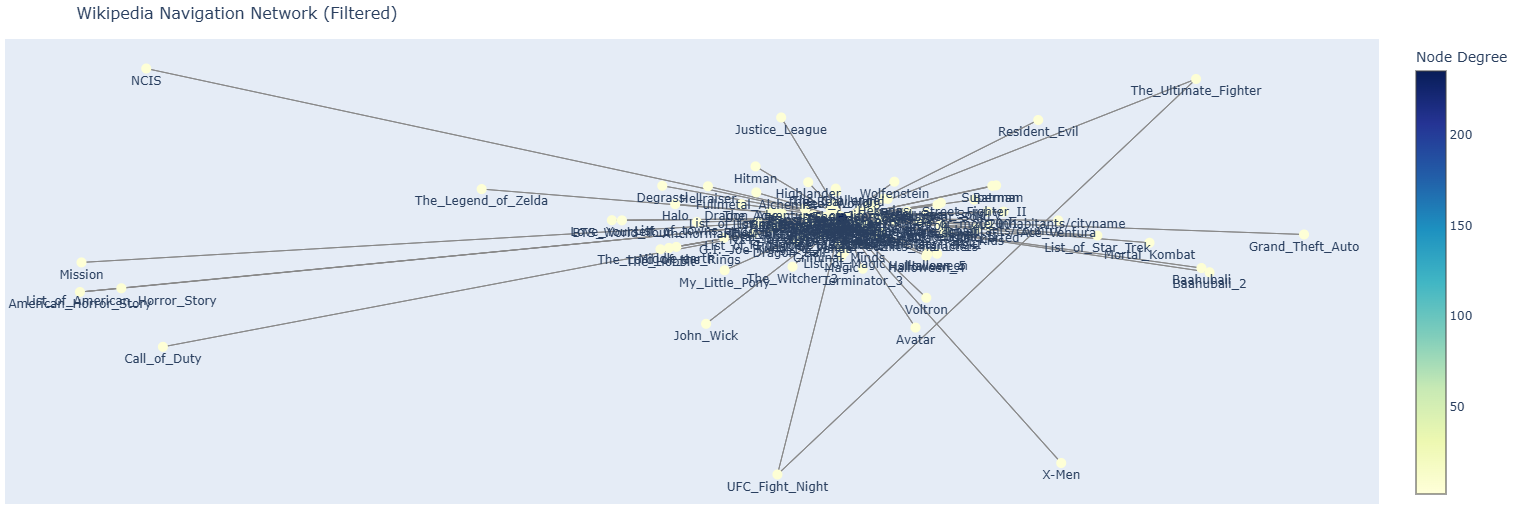

- **Entertainment-Centric Clusters**: The network is dominated by a dense core of pop-culture topics, showing high interconnectivity between cinematic universes (Marvel, Star Wars), gaming (GTA, Pokémon), and anime.

- **"Small World" Network Structure**: Most articles are connected within a few clicks, forming a dense central hub where users explore related lore through "deep-dive" navigation.

### 4. Summary  

In the analysis above, we've split the English Wikipedia clickstream edges dataset by reference type and by external referer category, and inspected the resulting clickstream edge subsets' descriptive stats, frequency distributions and top edges by traffic volume.  
For linked and internal search edges, we've also aggregated the edges to starting and terminal articles to inspect the top hub and authority articles.

## Key Findings from Extended Analysis:

- Temporal Volatility: We observed that 'Foundational' pages (e.g., Main Page) maintain stable traffic (Volatility Score < 0.1), while 'Event-Driven' pages (e.g., Cook's Country) exhibit massive volatility (Score > 2.5), confirming the platform's dual role as a reference and a news source.
- Traffic Composition: Distinct user behaviors emerged based on traffic source. 'Fact-Checking' topics (e.g., Bahar bin Smith) rely almost 100% on external search, whereas 'Deep-Dive' topics (e.g., Chen (singer)) rely ~95% on internal navigation.